### Connection with DB

In [106]:
# DB connect
import mysql.connector

remote = mysql.connector.connect(
    host = "database-eda.chuw4mu887pw.ap-northeast-2.rds.amazonaws.com",
    user = "root",
    password = "myung234",
    database = "eda"
)
cur = remote.cursor(buffered = True)

In [105]:
remote.close()  # 안함

### Show contents

In [3]:
def showAll(t_name):
    sql = "select * from {}".format(t_name)
    cur.execute(sql)
    result = cur.fetchall()
    for e in result:
        print(e)

def showSql(sql):
    cur.execute(sql)
    result = cur.fetchall()
    for e in result:
        print(e)

def showDesc(t_name):
    sql = "desc {}".format(t_name)
    cur.execute(sql)
    result = cur.fetchall()
    for e in result:
        print(e)

### Return contents

In [4]:
def getCnt(sql):
    cur.execute(sql)
    result = cur.fetchall()
    return result[0][0]

### Show Tables

In [5]:
def showTab(sql):
    cur.execute(sql)
    result = cur.fetchall()
    for e in result:
        print(e)

### Import a module for viewing graphs:

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import koreanize_matplotlib
from plotly.subplots import make_subplots

### Graph
* 날씨별 자율주행 사고 

In [7]:
# 자율주행 맑음
sql0 = """SELECT COUNT(*)
FROM car_accident
WHERE auto_id = 0
AND weather_id = 0"""
# 자율주행 흐림
sql1 = """SELECT COUNT(*)
FROM car_accident
WHERE auto_id = 0
AND weather_id = 1"""
# 자율주행 비
sql2 = """SELECT COUNT(*)
FROM car_accident
WHERE auto_id = 0
AND weather_id = 2"""
# 자율주행 눈
sql3 = """SELECT COUNT(*)
FROM car_accident
WHERE auto_id = 0
AND weather_id = 3"""

auto_cnt0 = getCnt(sql0)
auto_cnt1 = getCnt(sql1)
auto_cnt2 = getCnt(sql2)
auto_cnt3 = getCnt(sql3)


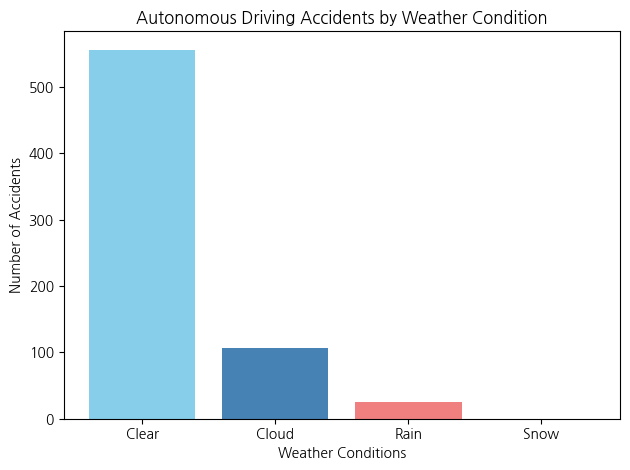

In [8]:
weather = ["Clear", "Cloud", "Rain", "Snow"]
acci = [auto_cnt0, auto_cnt1, auto_cnt2, auto_cnt3]

# 그래프 생성
colors = ["skyblue", "steelblue", "lightcoral", "gray"]
plt.bar(weather, acci, color = colors)

# 설정
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title('Autonomous Driving Accidents by Weather Condition')
plt.tight_layout()

# 출력
plt.show()

* 날씨별 비자율주행 사고

In [9]:
# non 자율주행 맑음
non_sql0 = """SELECT COUNT(*)
FROM car_accident
WHERE auto_id = 1
AND weather_id = 0"""
# non 자율주행 흐림
non_sql1 = """SELECT COUNT(*)
FROM car_accident
WHERE auto_id = 1
AND weather_id = 1"""
# non 자율주행 비
non_sql2 = """SELECT COUNT(*)
FROM car_accident
WHERE auto_id = 1
AND weather_id = 2"""
# non 자율주행 눈
non_sql3 = """SELECT COUNT(*)
FROM car_accident
WHERE auto_id = 1
AND weather_id = 3"""

non_cnt0 = getCnt(non_sql0)
non_cnt1 = getCnt(non_sql1)
non_cnt2 = getCnt(non_sql2)
non_cnt3 = getCnt(non_sql3)

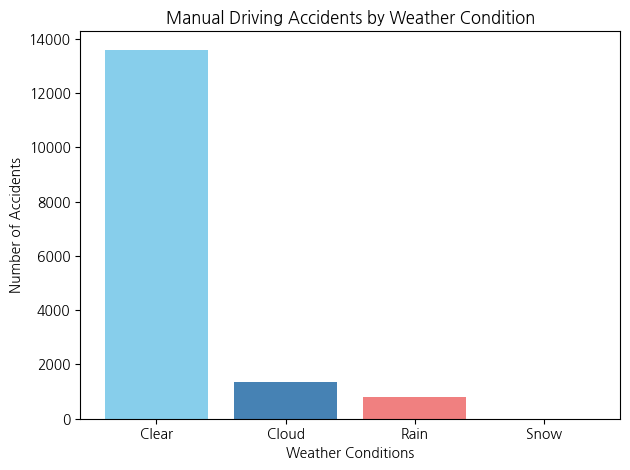

In [10]:
weather = ["Clear", "Cloud", "Rain", "Snow"]
acci = [non_cnt0, non_cnt1, non_cnt2, non_cnt3]

# 그래프 생성
colors = ["skyblue", "steelblue", "lightcoral", "gray"]
plt.bar(weather, acci, color = colors)

# 설정
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title('Manual Driving Accidents by Weather Condition')
plt.tight_layout()

# 출력
plt.show()

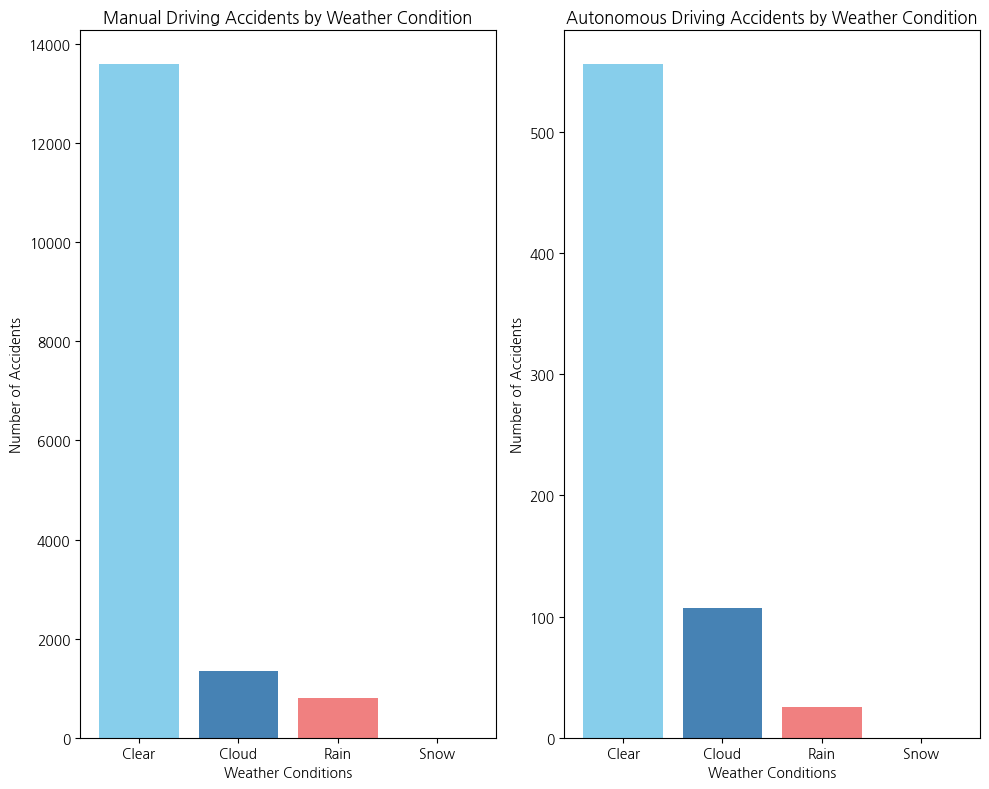

In [11]:
# 데이터
weather = ["Clear", "Cloud", "Rain", "Snow"]
manual_acci = [non_cnt0, non_cnt1, non_cnt2, non_cnt3]
auto_acci = [auto_cnt0, auto_cnt1, auto_cnt2, auto_cnt3]
colors = ["skyblue", "steelblue", "lightcoral", "gray"]

# 서브플롯 생성
plt.figure(figsize=(10, 8))

# 첫 번째 그래프 (Manual Driving)
plt.subplot(1, 2, 1)  # (행, 열, 그래프 순서)
plt.bar(weather, manual_acci, color=colors)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title('Manual Driving Accidents by Weather Condition')

# 두 번째 그래프 (Autonomous Driving)
plt.subplot(1, 2, 2)
plt.bar(weather, auto_acci, color=colors)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title('Autonomous Driving Accidents by Weather Condition')

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

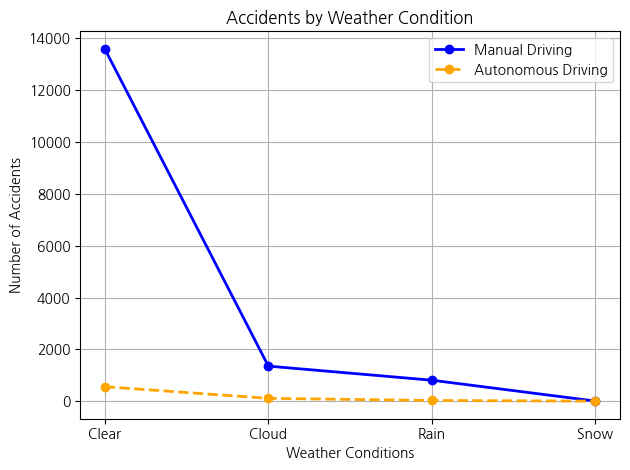

In [12]:
# 데이터
weather_conditions = ["Clear", "Cloud", "Rain", "Snow"]
manual_acci = [non_cnt0, non_cnt1, non_cnt2, non_cnt3]
auto_acci = [auto_cnt0, auto_cnt1, auto_cnt2, auto_cnt3]

# 그래프 생성
plt.plot(weather_conditions, manual_acci, marker='o', label='Manual Driving', linestyle='-', linewidth=2, color='blue')
plt.plot(weather_conditions, auto_acci, marker='o', label='Autonomous Driving', linestyle='--', linewidth=2, color='orange')

# 설정
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Weather Condition')
plt.legend()
plt.grid(True)
plt.tight_layout()

# 출력
plt.show()


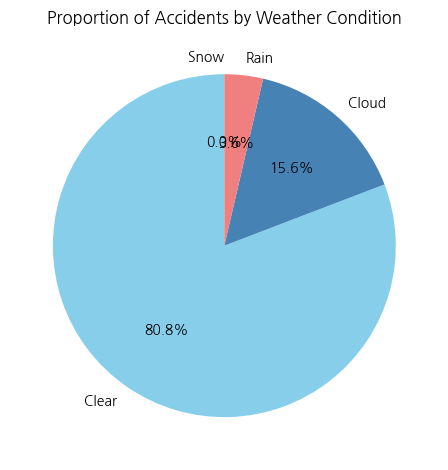

In [13]:
# 데이터
weather_conditions = ["Clear", "Cloud", "Rain", "Snow"]
accidents = [auto_cnt0, auto_cnt1, auto_cnt2, auto_cnt3]
colors = ["skyblue", "steelblue", "lightcoral", "gray"]

# 원형그래프 생성
plt.pie(accidents, labels=weather_conditions, autopct='%1.1f%%', startangle=90, colors=colors)

# 설정
plt.title("Proportion of Accidents by Weather Condition")
plt.tight_layout()

# 출력
plt.show()


In [14]:
# 데이터
weather_conditions = ["Clear", "Cloud", "Rain", "Snow"]
manual_acci = [non_cnt0, non_cnt1, non_cnt2, non_cnt3]
colors = ["skyblue", "steelblue", "lightcoral", "gray"]

# 데이터 준비
data = pd.DataFrame({
    'Weather': weather_conditions,
    'Accidents': manual_acci
})

# 원형그래프 생성 (Plotly)
fig = px.pie(data, values='Accidents', names='Weather', title='Proportion of Accidents by Weather Condition',
             color_discrete_sequence=colors, hole=0.3)  # 도넛형으로 설정 가능
fig.update_traces(textposition='outside', textinfo='percent+label')  # 텍스트를 바깥에 표시

# 출력
fig.show()


In [15]:
# 데이터
weather_conditions = ["Clear", "Cloud", "Rain", "Snow"]
auto_acci = [auto_cnt0, auto_cnt1, auto_cnt2, auto_cnt3]
colors = ["skyblue", "steelblue", "lightcoral", "gray"]

# 데이터 준비
data = pd.DataFrame({
    'Weather': weather_conditions,
    'Accidents': auto_acci
})

# 원형그래프 생성 (Plotly)
fig = px.pie(data, values='Accidents', names='Weather', title='Proportion of Accidents by Weather Condition',
             color_discrete_sequence=colors, hole=0.3)  # 도넛형으로 설정 가능
fig.update_traces(textposition='outside', textinfo='percent+label')  # 텍스트를 바깥에 표시

# 출력
fig.show()


In [16]:
# 데이터 (Manual Driving)
weather_conditions = ["Clear", "Cloud", "Rain", "Snow"]
manual_acci = [non_cnt0, non_cnt1, non_cnt2, non_cnt3]

# 데이터 (Autonomous Driving)
auto_acci = [auto_cnt0, auto_cnt1, auto_cnt2, auto_cnt3]

# 서브플롯 생성
fig = make_subplots(
    rows=1, cols=2,  # 1행 2열로 배치
    specs=[[{"type": "domain"}, {"type": "domain"}]],  # 원형그래프 타입 지정
    subplot_titles=("Manual Driving", "Autonomous Driving")  # 각 그래프 제목
)

# Manual Driving 원형 그래프 추가
fig.add_trace(
    go.Pie(
        labels=weather_conditions,
        values=manual_acci,
        name="Manual Driving",
        marker=dict(colors=["skyblue", "steelblue", "lightcoral", "gray"])
    ),
    row=1, col=1
)

# Autonomous Driving 원형 그래프 추가
fig.add_trace(
    go.Pie(
        labels=weather_conditions,
        values=auto_acci,
        name="Autonomous Driving",
        marker=dict(colors=["skyblue", "steelblue", "lightcoral", "gray"])
    ),
    row=1, col=2
)

# 레이아웃 설정
fig.update_layout(
    title_text="Comparison of Accidents by Weather Condition",
    title_x=0.5,  # 제목 가운데 정렬
    annotations=[
        dict(text='Manual Driving', x=0.2, y=0.5, font_size=12, showarrow=False),
        dict(text='Autonomous Driving', x=0.8, y=0.5, font_size=12, showarrow=False)
    ]
)

# 출력
fig.show()


In [56]:
# 데이터 (Manual Driving)
weather_conditions = ["Clear", "Cloud", "Rain", "Snow"]
manual_acci = [non_cnt0, non_cnt1, non_cnt2, non_cnt3]

# 데이터 (Autonomous Driving)
auto_acci = [auto_cnt0, auto_cnt1, auto_cnt2, auto_cnt3]

# 서브플롯 생성
fig = make_subplots(
    rows=1, cols=2,  # 1행 2열로 배치
    specs=[[{"type": "domain"}, {"type": "domain"}]],  # 원형그래프 타입 지정
    subplot_titles=("Manual Driving", "Autonomous Driving")  # 각 그래프 제목
)

# Manual Driving 도넛 그래프 추가
fig.add_trace(
    go.Pie(
        labels=weather_conditions,
        values=manual_acci,
        name="Manual Driving",
        hole=0.4,  # 도넛형으로 설정
        marker=dict(colors=["skyblue", "steelblue", "lightcoral", "gray"])
    ),
    row=1, col=1
)

# Autonomous Driving 도넛 그래프 추가
fig.add_trace(
    go.Pie(
        labels=weather_conditions,
        values=auto_acci,
        name="Autonomous Driving",
        hole=0.4,  # 도넛형으로 설정
        marker=dict(colors=["skyblue", "steelblue", "lightcoral", "gray"])
    ),
    row=1, col=2
)

# 레이아웃 설정
fig.update_layout(
    title_text="Comparison of Accidents by Weather Condition",
    title_x=0.5,  # 제목 가운데 정렬
    annotations=[
        dict(text='Manual Driving', x=0.2, y=0.5, font_size=12, showarrow=False),
        dict(text='Autonomous Driving', x=0.8, y=0.5, font_size=12, showarrow=False)
    ]
)

# 출력
fig.show()

### 움직임에 따른 사고횟수

In [21]:
# 중앙선침범, 차로위반, 직진, 좌/우회전, 유턴, 주차, 음주, 졸음, 기타
mov_auto_cnts = []
mov_mal_cnts = []

for i in range(8):
    tmp = "SELECT COUNT(*) FROM car_accident WHERE auto_id = 0 AND movement_id = {}".format(i)
    tmp2 = "SELECT COUNT(*) FROM car_accident WHERE auto_id = 1 AND movement_id = {}".format(i)
    mov_auto_cnts.append(getCnt(tmp))
    mov_mal_cnts.append(getCnt(tmp2))

mov_auto_cnts
mov_mal_cnts

[310, 935, 4492, 2103, 0, 23, 657, 0]

In [19]:
# 데이터
movement_condi = ["중앙선 침범", "차로위반", "직진", "좌/우회전", "유턴", "주치", "음주", "졸음"]
auto_acci = mov_auto_cnts
colors = ['skyblue', 'steelblue', 'lightcoral', 'gray', 'orange', 'purple', 'limegreen', 'gold']

# 데이터 준비
data = pd.DataFrame({
    'Weather': movement_condi,
    'Accidents': auto_acci
})

# 원형그래프 생성 (Plotly)
fig = px.pie(data, values='Accidents', names='Weather', title='Proportion of Accidents by Weather Condition',
             color_discrete_sequence=colors, hole=0.3)  # 도넛형으로 설정 가능
fig.update_traces(textposition='outside', textinfo='percent+label')  # 텍스트를 바깥에 표시

# 출력
fig.show()

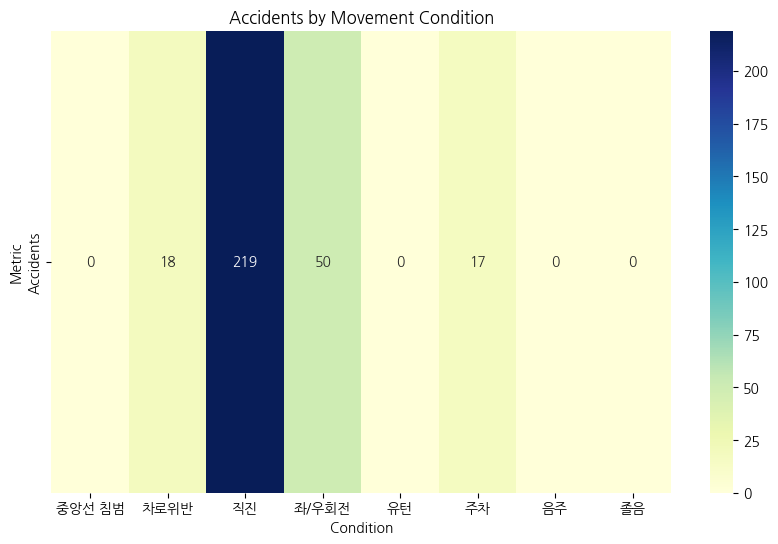

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터
movement_condi = ["중앙선 침범", "차로위반", "직진", "좌/우회전", "유턴", "주차", "음주", "졸음"]
auto_acci = mov_auto_cnts  # 여기에 실제 사고 데이터 리스트를 넣어주세요

# 데이터프레임으로 변환
data = pd.DataFrame({
    "Condition": movement_condi,
    "Accidents": auto_acci
})

# 히트맵용 데이터 변환 (행렬 형태)
heatmap_data = data.set_index("Condition").T  # 행: 조건, 열: 사고 수

# 히트맵 생성
plt.figure(figsize=(10, 6))  # 히트맵 크기 설정
#sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", cbar=True)  # 값 표시 및 색상 맵 설정
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap = "YlGnBu")  
plt.title("Accidents by Movement Condition")  # 제목
plt.xlabel("Condition")  # X축 제목
plt.ylabel("Metric")  # Y축 제목
plt.show()

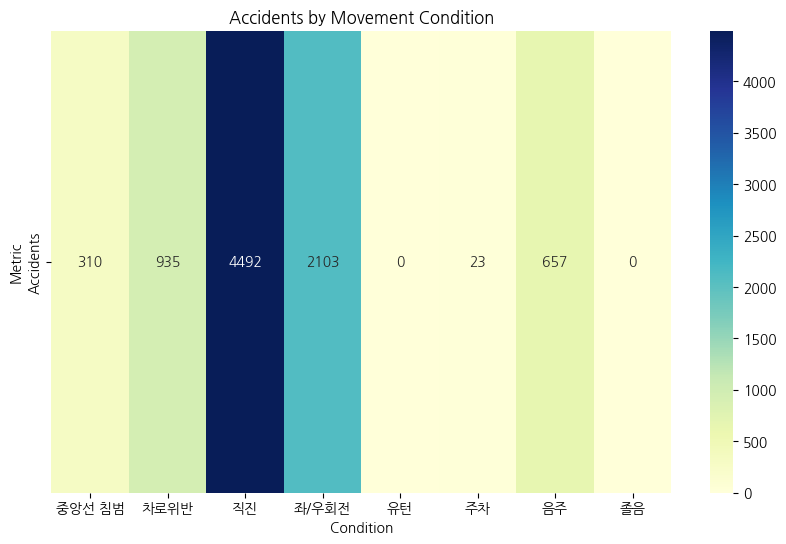

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pltgsize=(10, 6))  # 히트맵 크기 설정
#sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", cbar=True)  # 값 표시 및 색상 맵 설정
movement_condi = ["중앙선 침범", "차로위반", "직진", "좌/우회전", "유턴", "주차", "음주", "졸음"]
auto_acci = mov_mal_cnts  # 여기에 실제 사고 데이터 리스트를 넣어주세요

# 데이터프레임으로 변환
data = pd.DataFrame({
    "Condition": movement_condi,
    "Accidents": auto_acci
})

# 히트맵용 데이터 변환 (행렬 형태)
heatmap_data = data.set_index("Condition").T  # 행: 조건, 열: 사고 수

# 히트맵 생성
plt.figure(figsize=(10, 6))  # 히트맵 크기 설정
#sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", cbar=True)  # 값 표시 및 색상 맵 설정
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap = "YlGnBu")  
plt.title("Accidents by Movement Condition")  # 제목
plt.xlabel("Condition")  # X축 제목
plt.ylabel("Metric")  # Y축 제목
plt.show()

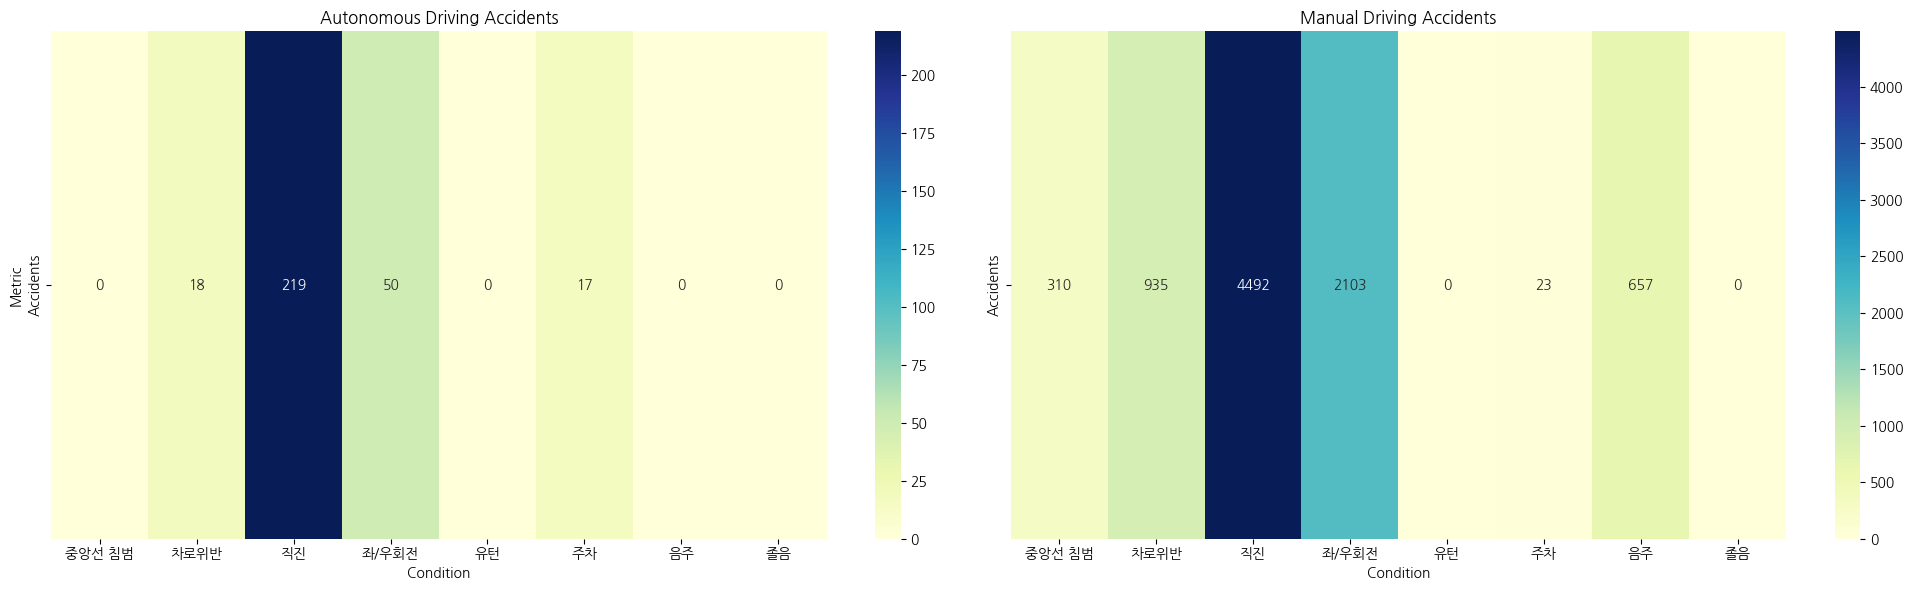

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터
movement_condi = ["중앙선 침범", "차로위반", "직진", "좌/우회전", "유턴", "주차", "음주", "졸음"]
auto_acci = mov_auto_cnts  # 첫 번째 데이터
manual_acci = mov_mal_cnts  # 두 번째 데이터

# 첫 번째 데이터프레임
data_auto = pd.DataFrame({
    "Condition": movement_condi,
    "Accidents": auto_acci
})
heatmap_data_auto = data_auto.set_index("Condition").T  # 행: 조건, 열: 사고 수

# 두 번째 데이터프레임
data_manual = pd.DataFrame({
    "Condition": movement_condi,
    "Accidents": manual_acci
})
heatmap_data_manual = data_manual.set_index("Condition").T  # 행: 조건, 열: 사고 수

# 서브플롯 생성
plt.figure(figsize=(20, 6))  # 전체 그래프 크기

# 첫 번째 히트맵 (자동운전)
plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 그래프
sns.heatmap(heatmap_data_auto, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Autonomous Driving Accidents")  # 제목
plt.xlabel("Condition")  # X축 제목
plt.ylabel("Metric")  # Y축 제목

# 두 번째 히트맵 (수동운전)
plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 그래프
sns.heatmap(heatmap_data_manual, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Manual Driving Accidents")  # 제목
plt.xlabel("Condition")  # X축 제목
plt.ylabel("")  # Y축 제목 제거 (중복 방지)

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()


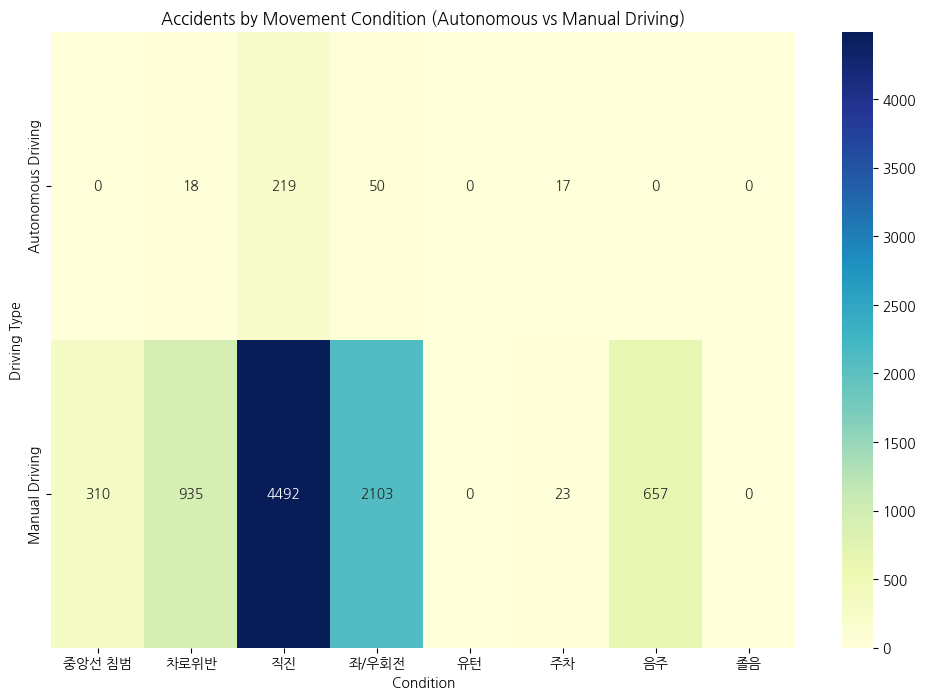

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터
movement_condi = ["중앙선 침범", "차로위반", "직진", "좌/우회전", "유턴", "주차", "음주", "졸음"]
auto_acci = mov_auto_cnts  # 자동운전 사고 데이터
manual_acci = mov_mal_cnts  # 수동운전 사고 데이터

# 데이터프레임 생성
data = pd.DataFrame({
    "Condition": movement_condi,
    "Autonomous Driving": auto_acci,
    "Manual Driving": manual_acci
})

# 히트맵용 데이터 변환 (행렬 형태)
heatmap_data = data.set_index("Condition").T  # 행: 운전 유형, 열: 조건

# 히트맵 생성
plt.figure(figsize=(12, 8))  # 그래프 크기 설정
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)  # 히트맵 생성

# 제목 및 라벨 설정
plt.title("Accidents by Movement Condition (Autonomous vs Manual Driving)")
plt.xlabel("Condition")
plt.ylabel("Driving Type")

# 출력
plt.show()

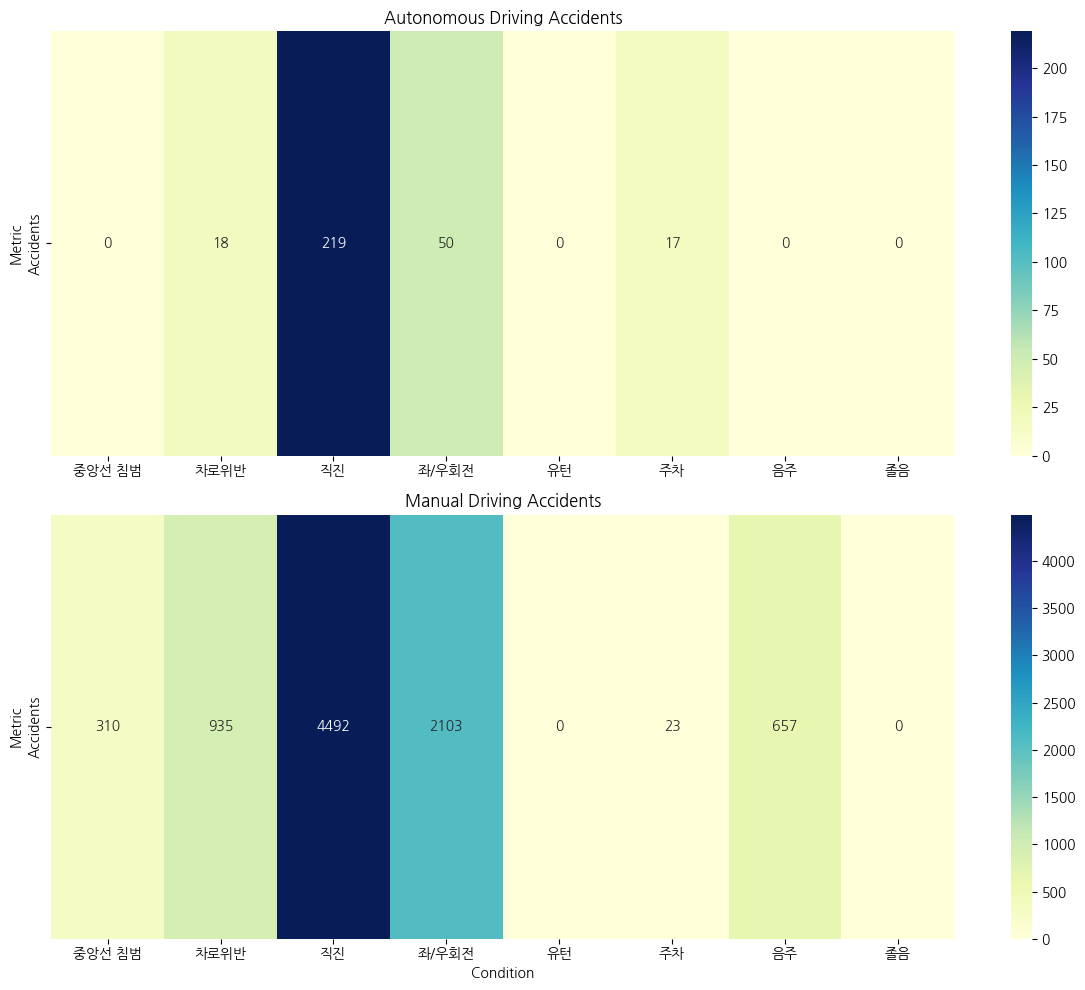

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터
movement_condi = ["중앙선 침범", "차로위반", "직진", "좌/우회전", "유턴", "주차", "음주", "졸음"]
auto_acci = mov_auto_cnts  # 자동운전 사고 데이터
manual_acci = mov_mal_cnts  # 수동운전 사고 데이터

# 첫 번째 데이터프레임 (Autonomous Driving)
data_auto = pd.DataFrame({
    "Condition": movement_condi,
    "Accidents": auto_acci
})
heatmap_data_auto = data_auto.set_index("Condition").T  # 행: 조건, 열: 사고 수

# 두 번째 데이터프레임 (Manual Driving)
data_manual = pd.DataFrame({
    "Condition": movement_condi,
    "Accidents": manual_acci
})
heatmap_data_manual = data_manual.set_index("Condition").T  # 행: 조건, 열: 사고 수

# 서브플롯 생성
plt.figure(figsize=(12, 10))  # 전체 그래프 크기 설정

# 첫 번째 히트맵 (Autonomous Driving)
plt.subplot(2, 1, 1)  # 2행 1열의 첫 번째 서브플롯
sns.heatmap(heatmap_data_auto, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Autonomous Driving Accidents")  # 제목
plt.xlabel("")  # X축 라벨 제거 (중복 방지)
plt.ylabel("Metric")  # Y축 라벨

# 두 번째 히트맵 (Manual Driving)
plt.subplot(2, 1, 2)  # 2행 1열의 두 번째 서브플롯
sns.heatmap(heatmap_data_manual, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Manual Driving Accidents")  # 제목
plt.xlabel("Condition")  # X축 라벨
plt.ylabel("Metric")  # Y축 라벨

# 레이아웃 조정 및 출력
plt.tight_layout()  # 그래프 간 간격 자동 조정
plt.show()


### 년도에 따른 자율주행 움직임 경향

In [54]:
2021, 2022, 2023, 2024

sql = """
SELECT COUNT(*)
FROM car_accident
WHERE auto_id = 0
AND movement_id = 10
AND accident_date LIKE "%2021%"; 
"""

getCnt(sql)

0

In [62]:
year_auto_movement = []
y = [2021, 2022, 2023, 2024]
for e in y:
    tmp = "SELECT COUNT(*) FROM car_accident WHERE auto_id = 0 AND movement_id = {}".format(i)
    l = []
    for i in range(8):
        sql = """
        SELECT COUNT(*)
        FROM car_accident
        WHERE auto_id = 0
        AND movement_id = {}
        AND accident_date LIKE "%{}%"; 
        """.format(i, e)
        l.append(getCnt(sql))
    year_auto_movement.append(l)
for e in year_auto_movement:
    print(e)

[0, 4, 26, 6, 0, 0, 0, 0]
[0, 3, 68, 12, 0, 0, 0, 0]
[0, 5, 86, 18, 0, 8, 0, 0]
[0, 6, 39, 14, 0, 9, 0, 0]


In [ ]:
for i in range(8):
    tmp = "SELECT COUNT(*) FROM car_accident WHERE auto_id = 0 AND movement_id = {}".format(i)
    tmp2 = "SELECT COUNT(*) FROM car_accident WHERE auto_id = 1 AND movement_id = {}".format(i)
    mov_auto_cnts.append(getCnt(tmp))
    mov_mal_cnts.append(getCnt(tmp2))

In [61]:
year_auto_movement = []
y = [2021]
for e in y:
    tmp = "SELECT COUNT(*) FROM car_accident WHERE auto_id = 0 AND movement_id = {}".format(i)
    l = []
    for i in range(8):
        sql = """
        SELECT COUNT(*) FROM car_accident
        WHERE auto_id = 0
        AND movement_id = {}
        AND accident_date LIKE "%{}%"; 
        """.format(i, e)
        l.append(getCnt(sql))
    year_auto_movement.append(l)
    
print(year_auto_movement)


[[0, 4, 26, 6, 0, 0, 0, 0]]


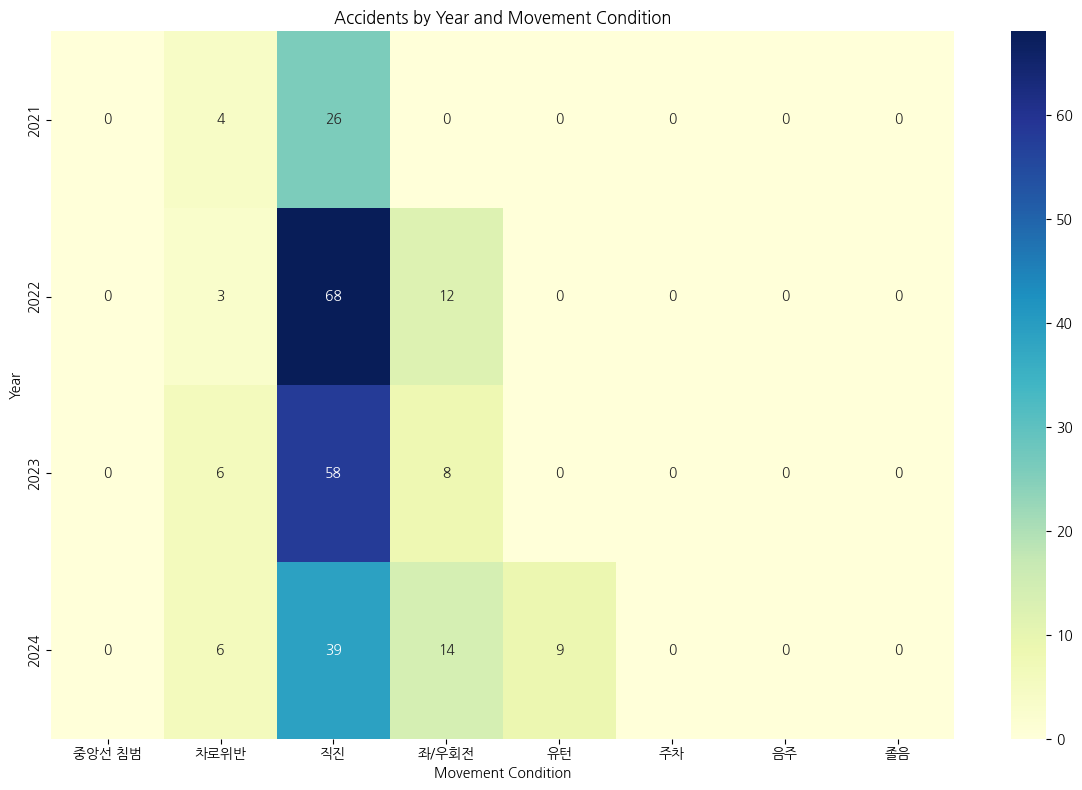

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 준비
movement_condi = ["중앙선 침범", "차로위반", "직진", "좌/우회전", "유턴", "주차", "음주", "졸음"]
years = [2021, 2022, 2023, 2024]

# year_auto_movement 데이터를 그대로 활용
year_auto_movement = [
    [0, 4, 26, 0, 0, 0, 0, 0],
    [0, 3, 68, 12, 0, 0, 0, 0],
    [0, 6, 58, 8, 0, 0, 0, 0],
    [0, 6, 39, 14, 9, 0, 0, 0]
]

# 데이터프레임 생성
data = pd.DataFrame(year_auto_movement, columns=movement_condi, index=years)

# 히트맵 생성
plt.figure(figsize=(12, 8))  # 히트맵 크기 설정
sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# 제목과 축 라벨 설정
plt.title("Accidents by Year and Movement Condition")
plt.xlabel("Movement Condition")
plt.ylabel("Year")
plt.tight_layout()

# 히트맵 출력
plt.show()


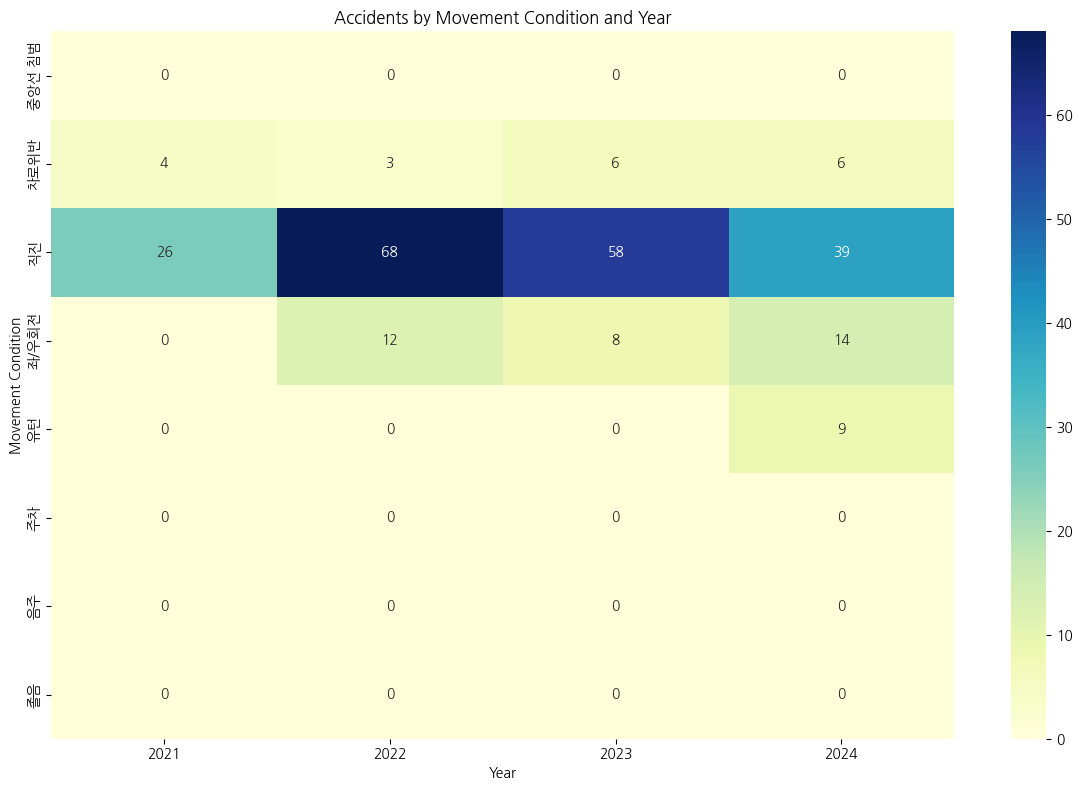

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 준비
movement_condi = ["중앙선 침범", "차로위반", "직진", "좌/우회전", "유턴", "주차", "음주", "졸음"]
years = [2021, 2022, 2023, 2024]

# year_auto_movement 데이터를 그대로 활용
year_auto_movement = [
    [0, 4, 26, 0, 0, 0, 0, 0],
    [0, 3, 68, 12, 0, 0, 0, 0],
    [0, 6, 58, 8, 0, 0, 0, 0],
    [0, 6, 39, 14, 9, 0, 0, 0]
]

# 데이터프레임 생성 (년도와 사고 종류 위치를 반대로)
data = pd.DataFrame(year_auto_movement, columns=movement_condi, index=years).T

# 히트맵 생성
plt.figure(figsize=(12, 8))  # 히트맵 크기 설정
sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# 제목과 축 라벨 설정
plt.title("Accidents by Movement Condition and Year")
plt.xlabel("Year")
plt.ylabel("Movement Condition")
plt.tight_layout()

# 히트맵 출력
plt.show()


In [ ]:
for i in range(4):
    for j in range(4):
        

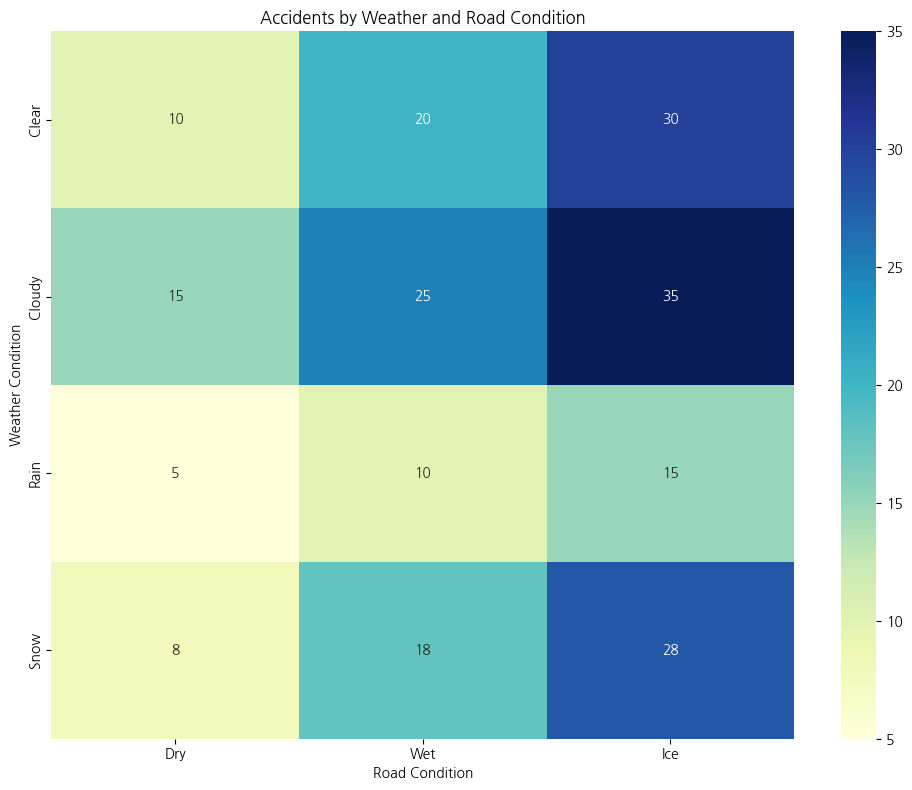

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 준비
weather_conditions = ["Clear", "Cloudy", "Rain", "Snow"]
road_conditions = ["Dry", "Wet", "Ice"]

# 예시 데이터 (16가지 조합의 사고 건수)
accidents = [
    [10, 20, 30],  # Clear
    [15, 25, 35],  # Cloudy
    [5, 10, 15],   # Rain
    [8, 18, 28]    # Snow
]

# 데이터프레임 생성
data = pd.DataFrame(accidents, index=weather_conditions, columns=road_conditions)

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# 제목과 축 라벨 설정
plt.title("Accidents by Weather and Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()


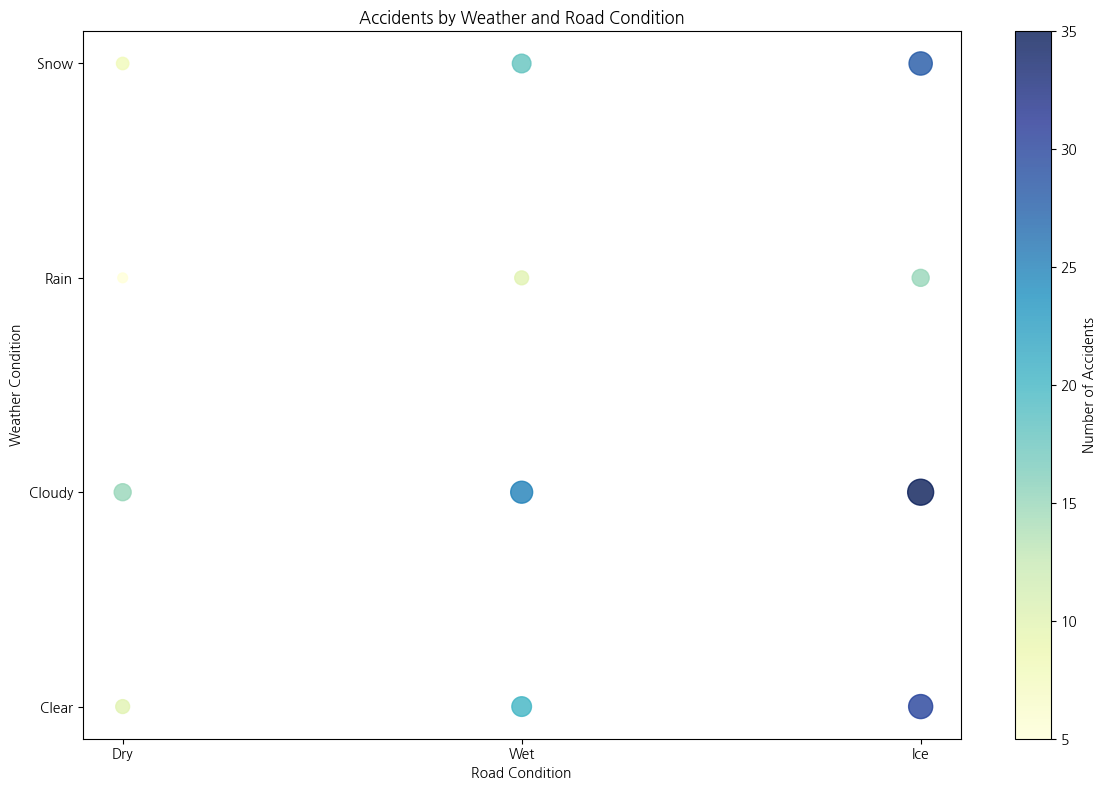

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
weather_conditions = ["Clear", "Cloudy", "Rain", "Snow"]
road_conditions = ["Dry", "Wet", "Ice"]

# 예시 데이터 (16가지 조합의 사고 건수)
accidents = [
    [10, 20, 30],  # Clear
    [15, 25, 35],  # Cloudy
    [5, 10, 15],   # Rain
    [8, 18, 28]    # Snow
]

# 데이터프레임 생성
data = pd.DataFrame(accidents, index=weather_conditions, columns=road_conditions)

# 도트 플롯 데이터 준비
x = []
y = []
values = []

for i, weather in enumerate(weather_conditions):
    for j, road in enumerate(road_conditions):
        x.append(road)  # 도로 상태
        y.append(weather)  # 날씨 조건
        values.append(data.iloc[i, j])  # 사고 건수

# 도트 플롯 생성
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x, y, 
    s=[v * 10 for v in values],  # 도트 크기: 사고 건수에 비례
    c=values, cmap="YlGnBu", alpha=0.8  # 색상: 사고 건수에 따라
)

# 색상 막대 추가
plt.colorbar(scatter, label="Number of Accidents")

# 제목과 축 라벨 설정
plt.title("Accidents by Weather and Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()


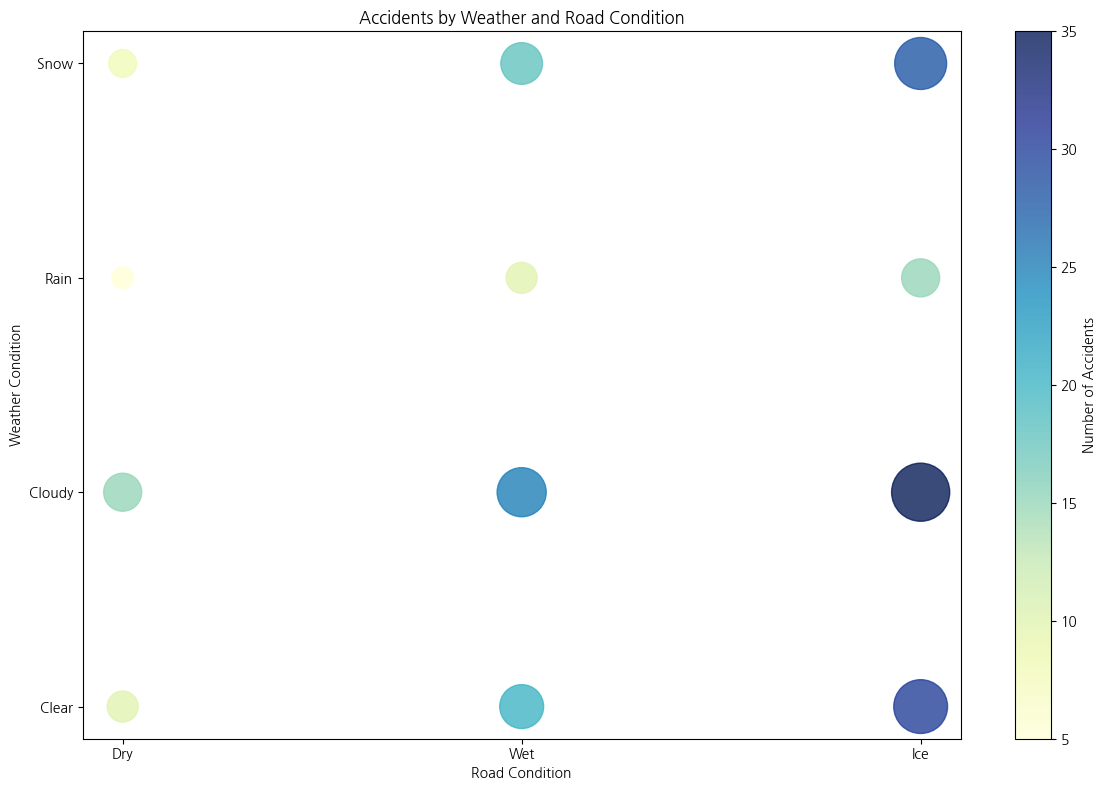

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
weather_conditions = ["Clear", "Cloudy", "Rain", "Snow"]
road_conditions = ["Dry", "Wet", "Ice"]

# 예시 데이터 (16가지 조합의 사고 건수)
accidents = [
    [10, 20, 30],  # Clear
    [15, 25, 35],  # Cloudy
    [5, 10, 15],   # Rain
    [8, 18, 28]    # Snow
]

# 데이터프레임 생성
data = pd.DataFrame(accidents, index=weather_conditions, columns=road_conditions)

# 도트 플롯 데이터 준비
x = []
y = []
values = []

for i, weather in enumerate(weather_conditions):
    for j, road in enumerate(road_conditions):
        x.append(road)  # 도로 상태
        y.append(weather)  # 날씨 조건
        values.append(data.iloc[i, j])  # 사고 건수

# 도트 플롯 생성
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x, y, 
    s=[v * 50 for v in values],  # 도트 크기: 사고 건수에 비례 (크기 증가)
    c=values, cmap="YlGnBu", alpha=0.8  # 색상: 사고 건수에 따라
)

# 색상 막대 추가
plt.colorbar(scatter, label="Number of Accidents")

# 제목과 축 라벨 설정
plt.title("Accidents by Weather and Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()


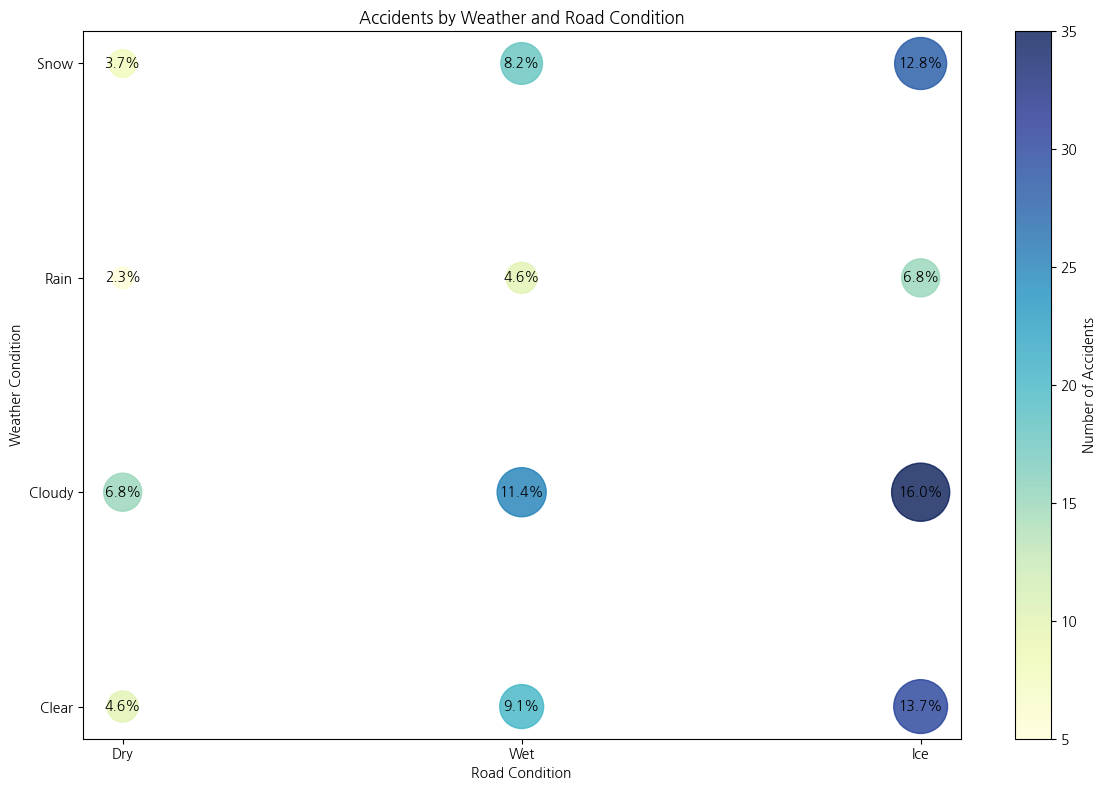

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
weather_conditions = ["Clear", "Cloudy", "Rain", "Snow"]
road_conditions = ["Dry", "Wet", "Ice"]

# 예시 데이터 (16가지 조합의 사고 건수)
accidents = [
    [10, 20, 30],  # Clear
    [15, 25, 35],  # Cloudy
    [5, 10, 15],   # Rain
    [8, 18, 28]    # Snow
]

# 데이터프레임 생성
data = pd.DataFrame(accidents, index=weather_conditions, columns=road_conditions)

# 도트 플롯 데이터 준비
x = []
y = []
values = []

# 총 사고 수 계산
total_accidents = data.values.sum()

for i, weather in enumerate(weather_conditions):
    for j, road in enumerate(road_conditions):
        x.append(road)  # 도로 상태
        y.append(weather)  # 날씨 조건
        values.append(data.iloc[i, j])  # 사고 건수

# 도트 플롯 생성
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x, y, 
    s=[v * 50 for v in values],  # 도트 크기: 사고 건수에 비례
    c=values, cmap="YlGnBu", alpha=0.8  # 색상: 사고 건수에 따라
)

# 원 안에 비율 표시
for i, (road, weather, value) in enumerate(zip(x, y, values)):
    percentage = (value / total_accidents) * 100  # 사고 건수 비율 계산
    plt.text(road, weather, f"{percentage:.1f}%", ha='center', va='center', color='black', fontsize=10)

# 색상 막대 추가
plt.colorbar(scatter, label="Number of Accidents")

# 제목과 축 라벨 설정
plt.title("Accidents by Weather and Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()


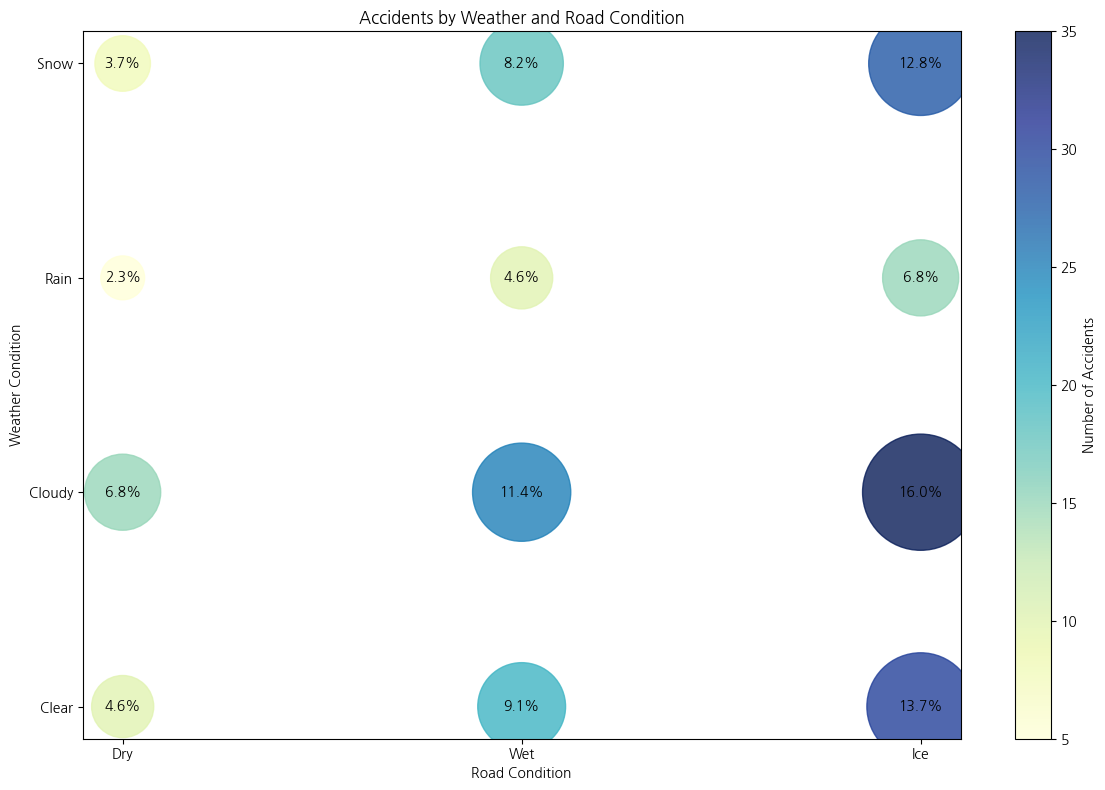

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
weather_conditions = ["Clear", "Cloudy", "Rain", "Snow"]
road_conditions = ["Dry", "Wet", "Ice"]

# 예시 데이터 (16가지 조합의 사고 건수)
accidents = [
    [10, 20, 30],  # Clear
    [15, 25, 35],  # Cloudy
    [5, 10, 15],   # Rain
    [8, 18, 28]    # Snow
]

# 데이터프레임 생성
data = pd.DataFrame(accidents, index=weather_conditions, columns=road_conditions)

# 도트 플롯 데이터 준비
x = []
y = []
values = []

# 총 사고 수 계산
total_accidents = data.values.sum()

for i, weather in enumerate(weather_conditions):
    for j, road in enumerate(road_conditions):
        x.append(road)  # 도로 상태
        y.append(weather)  # 날씨 조건
        values.append(data.iloc[i, j])  # 사고 건수

# 도트 플롯 생성
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x, y, 
    s=[v * 200 for v in values],  # 도트 크기: 사고 건수에 비례 (크기 대폭 증가)
    c=values, cmap="YlGnBu", alpha=0.8  # 색상: 사고 건수에 따라
)

# 원 안에 비율 표시
for i, (road, weather, value) in enumerate(zip(x, y, values)):
    percentage = (value / total_accidents) * 100  # 사고 건수 비율 계산
    plt.text(road, weather, f"{percentage:.1f}%", ha='center', va='center', color='black', fontsize=10)

# 색상 막대 추가
plt.colorbar(scatter, label="Number of Accidents")

# 제목과 축 라벨 설정
plt.title("Accidents by Weather and Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()


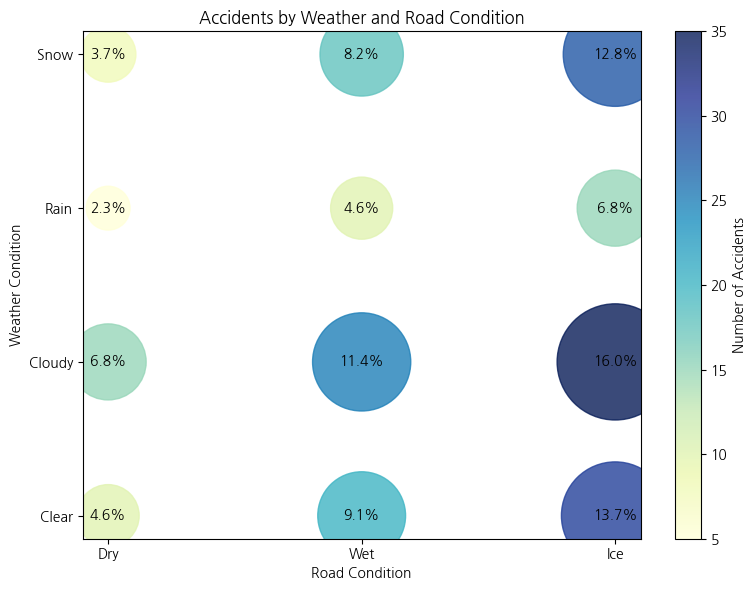

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
weather_conditions = ["Clear", "Cloudy", "Rain", "Snow"]
road_conditions = ["Dry", "Wet", "Ice"]

# 예시 데이터 (16가지 조합의 사고 건수)
accidents = [
    [10, 20, 30],  # Clear
    [15, 25, 35],  # Cloudy
    [5, 10, 15],   # Rain
    [8, 18, 28]    # Snow
]

# 데이터프레임 생성
data = pd.DataFrame(accidents, index=weather_conditions, columns=road_conditions)

# 도트 플롯 데이터 준비
x = []
y = []
values = []

# 총 사고 수 계산
total_accidents = data.values.sum()

for i, weather in enumerate(weather_conditions):
    for j, road in enumerate(road_conditions):
        x.append(j * 0.5)  # 도로 상태를 숫자 좌표로 (간격 줄이기)
        y.append(i * 0.5)  # 날씨 조건을 숫자 좌표로 (간격 줄이기)
        values.append(data.iloc[i, j])  # 사고 건수

# 도트 플롯 생성
plt.figure(figsize=(8, 6))  # 그래프 크기 조정
scatter = plt.scatter(
    x, y, 
    s=[v * 200 for v in values],  # 도트 크기
    c=values, cmap="YlGnBu", alpha=0.8  # 색상: 사고 건수에 따라
)

# 원 안에 비율 표시
for i, (x_val, y_val, value) in enumerate(zip(x, y, values)):
    percentage = (value / total_accidents) * 100  # 사고 건수 비율 계산
    plt.text(x_val, y_val, f"{percentage:.1f}%", ha='center', va='center', color='black', fontsize=10)

# X축과 Y축 레이블 변경
plt.xticks([j * 0.5 for j in range(len(road_conditions))], road_conditions)
plt.yticks([i * 0.5 for i in range(len(weather_conditions))], weather_conditions)

# 색상 막대 추가
plt.colorbar(scatter, label="Number of Accidents")

# 제목 및 라벨 설정
plt.title("Accidents by Weather and Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()


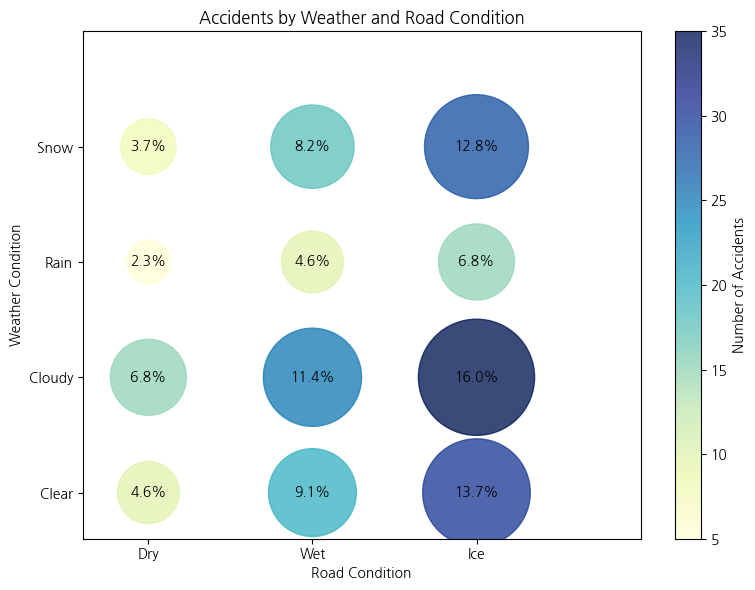

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
weather_conditions = ["Clear", "Cloudy", "Rain", "Snow"]
road_conditions = ["Dry", "Wet", "Ice"]

# 예시 데이터 (16가지 조합의 사고 건수)
accidents = [
    [10, 20, 30],  # Clear
    [15, 25, 35],  # Cloudy
    [5, 10, 15],   # Rain
    [8, 18, 28]    # Snow
]

# 데이터프레임 생성
data = pd.DataFrame(accidents, index=weather_conditions, columns=road_conditions)

# 도트 플롯 데이터 준비
x = []
y = []
values = []

# 총 사고 수 계산
total_accidents = data.values.sum()

for i, weather in enumerate(weather_conditions):
    for j, road in enumerate(road_conditions):
        x.append(j * 0.5)  # 도로 상태를 숫자 좌표로 (간격 줄이기)
        y.append(i * 0.5)  # 날씨 조건을 숫자 좌표로 (간격 줄이기)
        values.append(data.iloc[i, j])  # 사고 건수

# 도트 플롯 생성
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    x, y, 
    s=[v * 200 for v in values],  # 도트 크기
    c=values, cmap="YlGnBu", alpha=0.8  # 색상: 사고 건수에 따라
)

# 원 안에 비율 표시
for i, (x_val, y_val, value) in enumerate(zip(x, y, values)):
    percentage = (value / total_accidents) * 100  # 사고 건수 비율 계산
    plt.text(x_val, y_val, f"{percentage:.1f}%", ha='center', va='center', color='black', fontsize=10)

# X축과 Y축 레이블 변경
plt.xticks([j * 0.5 for j in range(len(road_conditions))], road_conditions)
plt.yticks([i * 0.5 for i in range(len(weather_conditions))], weather_conditions)

# 축 범위 설정 (양쪽 간격 조정)
plt.xlim(-0.2, len(road_conditions) * 0.5)  # X축: -0.2부터 끝값보다 약간 더 크게
plt.ylim(-0.2, len(weather_conditions) * 0.5)  # Y축: -0.2부터 끝값보다 약간 더 크게

# 색상 막대 추가
plt.colorbar(scatter, label="Number of Accidents")

# 제목 및 라벨 설정
plt.title("Accidents by Weather and Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()


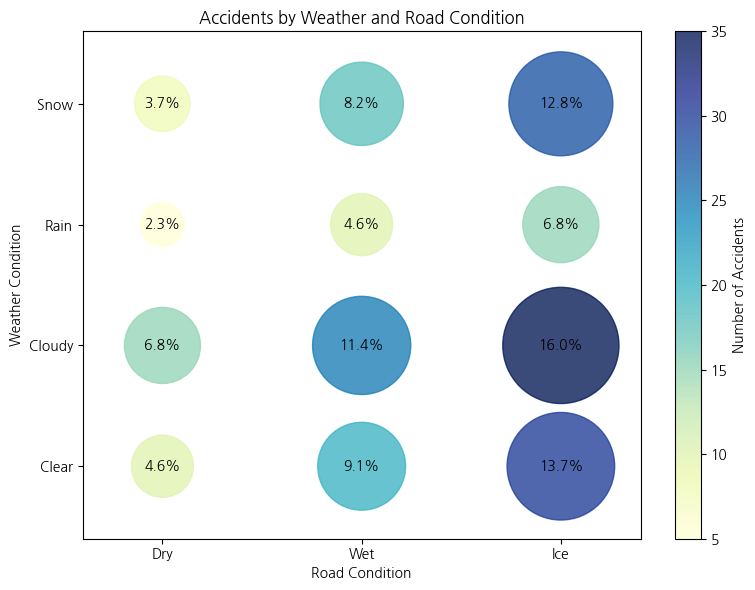

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
weather_conditions = ["Clear", "Cloudy", "Rain", "Snow"]
road_conditions = ["Dry", "Wet", "Ice"]

# 예시 데이터
accidents = [
    [10, 20, 30],  # Clear
    [15, 25, 35],  # Cloudy
    [5, 10, 15],   # Rain
    [8, 18, 28]    # Snow
]

# 데이터프레임 생성
data = pd.DataFrame(accidents, index=weather_conditions, columns=road_conditions)

# 도트 플롯을 위한 좌표와 값
x = []
y = []
values = []

# 전체 사고 건수
total_accidents = data.values.sum()

for i, weather in enumerate(weather_conditions):
    for j, road in enumerate(road_conditions):
        x.append(j * 0.5)  # x 좌표
        y.append(i * 0.5)  # y 좌표
        values.append(data.loc[weather, road])  # 사고 건수

# 그림/축 생성
fig, ax = plt.subplots(figsize=(8, 6))

# 산점도(버블 차트) 생성
scatter = ax.scatter(
    x, y,
    s=[v * 200 for v in values],
    c=values,
    cmap="YlGnBu",
    alpha=0.8
)

# 원 안에 비율 텍스트 추가
for x_val, y_val, value in zip(x, y, values):
    percentage = (value / total_accidents) * 100
    ax.text(x_val, y_val, f"{percentage:.1f}%", 
            ha='center', va='center', color='black', fontsize=10)

# X축, Y축 틱 설정
ax.set_xticks([j * 0.5 for j in range(len(road_conditions))])
ax.set_xticklabels(road_conditions)
ax.set_yticks([i * 0.5 for i in range(len(weather_conditions))])
ax.set_yticklabels(weather_conditions)

# 자동 스케일 및 여백 설정
ax.autoscale()
plt.margins(0.2)  # 여백 비율(적절히 조절 가능)

# 색상바 추가
cbar = plt.colorbar(scatter, ax=ax, label="Number of Accidents")

# 제목 및 라벨
plt.title("Accidents by Weather and Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Weather Condition")

# 레이아웃 정리
plt.tight_layout()
plt.show()


In [77]:
accidents = []

for i in range(4):
    l = []
    for j in range(3):
        sql = """
        SELECT COUNT(*) FROM car_accident
        WHERE auto_id = 0
        AND weather_id = {}
        AND pavement_id = {}; 
        """.format(i, j)
        l.append(getCnt(sql))
    accidents.append(l)

print(accidents)

[[554, 1, 1], [99, 7, 0], [0, 25, 0], [0, 0, 0]]


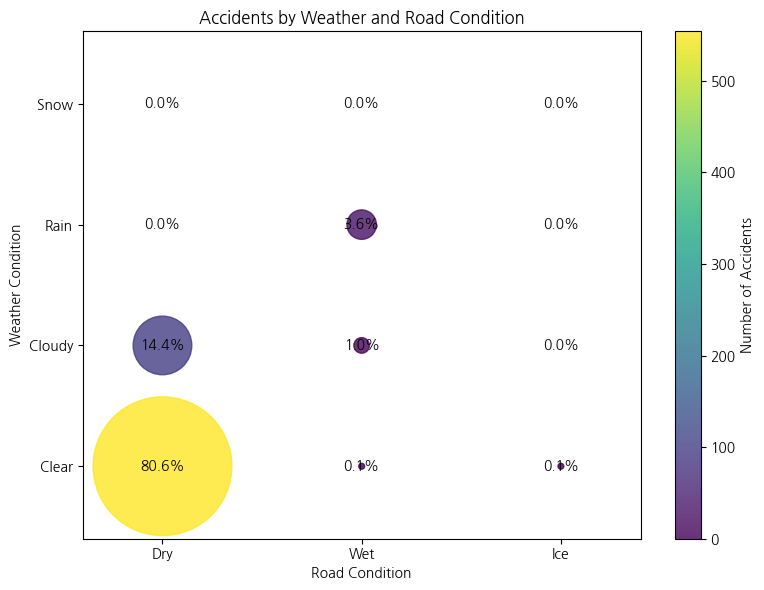

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
weather_conditions = ["Clear", "Cloudy", "Rain", "Snow"]
road_conditions = ["Dry", "Wet", "Ice"]

# 데이터프레임 생성
data = pd.DataFrame(accidents, index=weather_conditions, columns=road_conditions)

# 도트 플롯을 위한 좌표와 값
x = []
y = []
values = []

# 전체 사고 건수
total_accidents = data.values.sum()

for i, weather in enumerate(weather_conditions):
    for j, road in enumerate(road_conditions):
        x.append(j * 0.5)  # x 좌표
        y.append(i * 0.5)  # y 좌표
        values.append(data.loc[weather, road])  # 사고 건수

# 그림/축 생성
fig, ax = plt.subplots(figsize=(8, 6))

# 산점도(버블 차트) 생성
scatter = ax.scatter(
    x, y,
    s=[v * 18 for v in values],
    c=values,
    #cmap="YlGnBu",
    alpha=0.8
)

# 원 안에 비율 텍스트 추가
for x_val, y_val, value in zip(x, y, values):
    percentage = (value / total_accidents) * 100
    ax.text(x_val, y_val, f"{percentage:.1f}%", 
            ha='center', va='center', color='black', fontsize=10)

# X축, Y축 틱 설정
ax.set_xticks([j * 0.5 for j in range(len(road_conditions))])
ax.set_xticklabels(road_conditions)
ax.set_yticks([i * 0.5 for i in range(len(weather_conditions))])
ax.set_yticklabels(weather_conditions)

# 자동 스케일 및 여백 설정
ax.autoscale()
plt.margins(0.2)  # 여백 비율(적절히 조절 가능)

# 색상바 추가
cbar = plt.colorbar(scatter, ax=ax, label="Number of Accidents")

# 제목 및 라벨
plt.title("Accidents by Weather and Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Weather Condition")

# 레이아웃 정리
plt.tight_layout()
plt.show()

In [87]:
accidents2 = []

for i in range(4):
    l = []
    for j in range(3):
        sql = """
        SELECT COUNT(*) FROM car_accident
        WHERE auto_id = 1
        AND weather_id = {}
        AND pavement_id = {}; 
        """.format(i, j)
        l.append(getCnt(sql))
    accidents2.append(l)

print(accidents2)

[[13126, 226, 4], [855, 475, 1], [8, 791, 0], [1, 0, 0]]


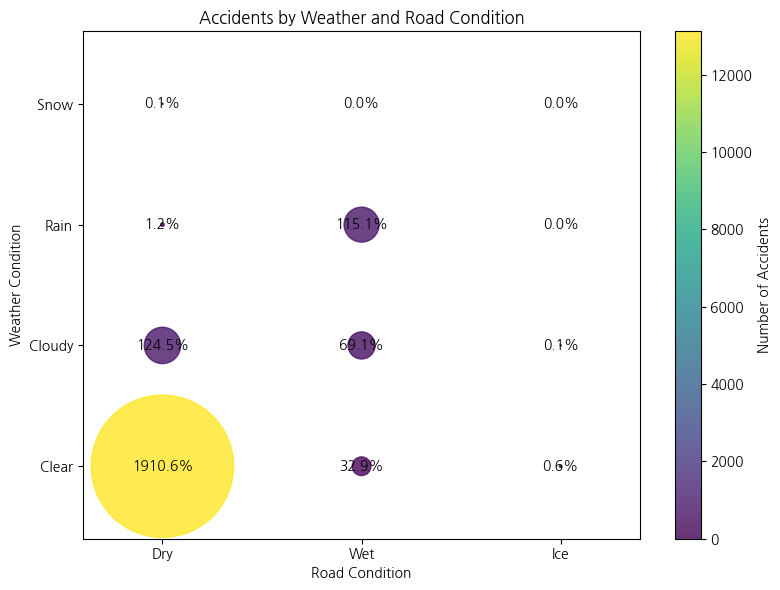

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
weather_conditions = ["Clear", "Cloudy", "Rain", "Snow"]
road_conditions = ["Dry", "Wet", "Ice"]

# 데이터프레임 생성
data = pd.DataFrame(accidents2, index=weather_conditions, columns=road_conditions)

# 도트 플롯을 위한 좌표와 값
x = []
y = []
values = []

# 전체 사고 건수
total_accidents2 = data.values.sum()

for i, weather in enumerate(weather_conditions):
    for j, road in enumerate(road_conditions):
        x.append(j * 0.5)  # x 좌표
        y.append(i * 0.5)  # y 좌표
        values.append(data.loc[weather, road])  # 사고 건수

# 그림/축 생성
fig, ax = plt.subplots(figsize=(8, 6))

# 산점도(버블 차트) 생성
scatter = ax.scatter(
    x, y,
    s=[v * 0.8 for v in values],
    c=values,
    #cmap="YlGnBu",
    alpha=0.8
)

# 원 안에 비율 텍스트 추가
for x_val, y_val, value in zip(x, y, values):
    percentage = (value / total_accidents) * 100
    ax.text(x_val, y_val, f"{percentage:.1f}%", 
            ha='center', va='center', color='black', fontsize=10)

# X축, Y축 틱 설정
ax.set_xticks([j * 0.5 for j in range(len(road_conditions))])
ax.set_xticklabels(road_conditions)
ax.set_yticks([i * 0.5 for i in range(len(weather_conditions))])
ax.set_yticklabels(weather_conditions)

# 자동 스케일 및 여백 설정
ax.autoscale()
plt.margins(0.2)  # 여백 비율(적절히 조절 가능)

# 색상바 추가
cbar = plt.colorbar(scatter, ax=ax, label="Number of Accidents")

# 제목 및 라벨
plt.title("Accidents by Weather and Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Weather Condition")

# 레이아웃 정리
plt.tight_layout()
plt.show()

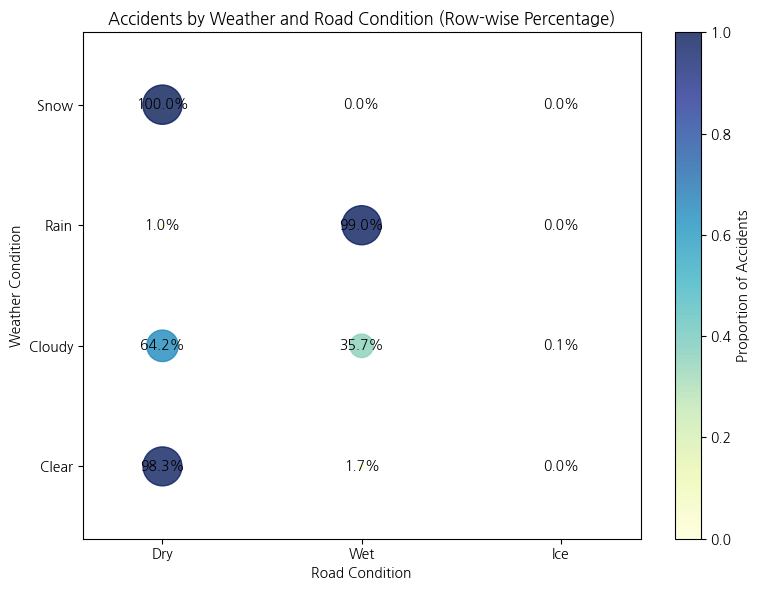

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
weather_conditions = ["Clear", "Cloudy", "Rain", "Snow"]
road_conditions = ["Dry", "Wet", "Ice"]

# 데이터프레임 생성
data = pd.DataFrame(accidents2, index=weather_conditions, columns=road_conditions)

# 행별 비율 계산
data_percentage = data.div(data.sum(axis=1), axis=0)  # 각 행의 합으로 나눔

# 도트 플롯을 위한 좌표와 값
x = []
y = []
values = []

for i, weather in enumerate(weather_conditions):
    for j, road in enumerate(road_conditions):
        x.append(j * 0.5)  # x 좌표
        y.append(i * 0.5)  # y 좌표
        values.append(data_percentage.loc[weather, road])  # 비율 값

# 그림/축 생성
fig, ax = plt.subplots(figsize=(8, 6))

# 산점도(버블 차트) 생성
scatter = ax.scatter(
    x, y,
    s=[v * 800 for v in values],  # 도트 크기: 비율에 비례
    c=values,
    cmap="YlGnBu",
    alpha=0.8
)

# 원 안에 비율 텍스트 추가
for x_val, y_val, value in zip(x, y, values):
    percentage = value * 100  # 비율을 퍼센트로 변환
    ax.text(x_val, y_val, f"{percentage:.1f}%", 
            ha='center', va='center', color='black', fontsize=10)

# X축, Y축 틱 설정
ax.set_xticks([j * 0.5 for j in range(len(road_conditions))])
ax.set_xticklabels(road_conditions)
ax.set_yticks([i * 0.5 for i in range(len(weather_conditions))])
ax.set_yticklabels(weather_conditions)

# 자동 스케일 및 여백 설정
ax.autoscale()
plt.margins(0.2)  # 여백 비율(적절히 조절 가능)

# 색상바 추가
cbar = plt.colorbar(scatter, ax=ax, label="Proportion of Accidents")

# 제목 및 라벨
plt.title("Accidents by Weather and Road Condition (Row-wise Percentage)")
plt.xlabel("Road Condition")
plt.ylabel("Weather Condition")

# 레이아웃 정리
plt.tight_layout()
plt.show()


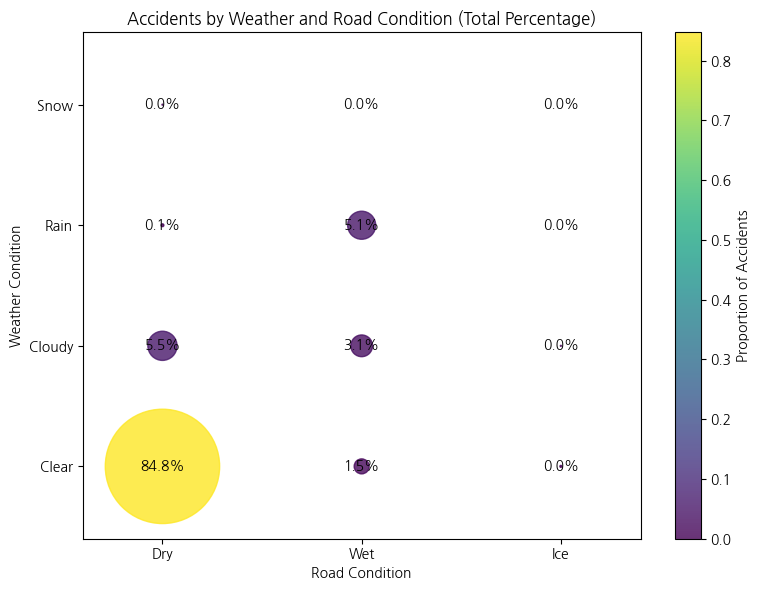

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
weather_conditions = ["Clear", "Cloudy", "Rain", "Snow"]
road_conditions = ["Dry", "Wet", "Ice"]

# 데이터프레임 생성
data = pd.DataFrame(accidents2, index=weather_conditions, columns=road_conditions)

# 전체 합계 기준 비율 계산
total_accidents = data.values.sum()  # 전체 사고 건수의 합
data_percentage = data / total_accidents  # 각 값을 전체 합으로 나눔

# 도트 플롯을 위한 좌표와 값
x = []
y = []
values = []

for i, weather in enumerate(weather_conditions):
    for j, road in enumerate(road_conditions):
        x.append(j * 0.5)  # x 좌표
        y.append(i * 0.5)  # y 좌표
        values.append(data_percentage.loc[weather, road])  # 비율 값

# 그림/축 생성
fig, ax = plt.subplots(figsize=(8, 6))

# 산점도(버블 차트) 생성
scatter = ax.scatter(
    x, y,
    s=[v * 8000 for v in values],  # 도트 크기: 비율에 비례
    c=values,
    alpha=0.8
)

# 원 안에 비율 텍스트 추가
for x_val, y_val, value in zip(x, y, values):
    percentage = value * 100  # 비율을 퍼센트로 변환
    ax.text(x_val, y_val, f"{percentage:.1f}%", 
            ha='center', va='center', color='black', fontsize=10)

# X축, Y축 틱 설정
ax.set_xticks([j * 0.5 for j in range(len(road_conditions))])
ax.set_xticklabels(road_conditions)
ax.set_yticks([i * 0.5 for i in range(len(weather_conditions))])
ax.set_yticklabels(weather_conditions)

# 자동 스케일 및 여백 설정
ax.autoscale()
plt.margins(0.2)  # 여백 비율(적절히 조절 가능)

# 색상바 추가
cbar = plt.colorbar(scatter, ax=ax, label="Proportion of Accidents")

# 제목 및 라벨
plt.title("Accidents by Weather and Road Condition (Total Percentage)")
plt.xlabel("Road Condition")
plt.ylabel("Weather Condition")

# 레이아웃 정리
plt.tight_layout()
plt.show()


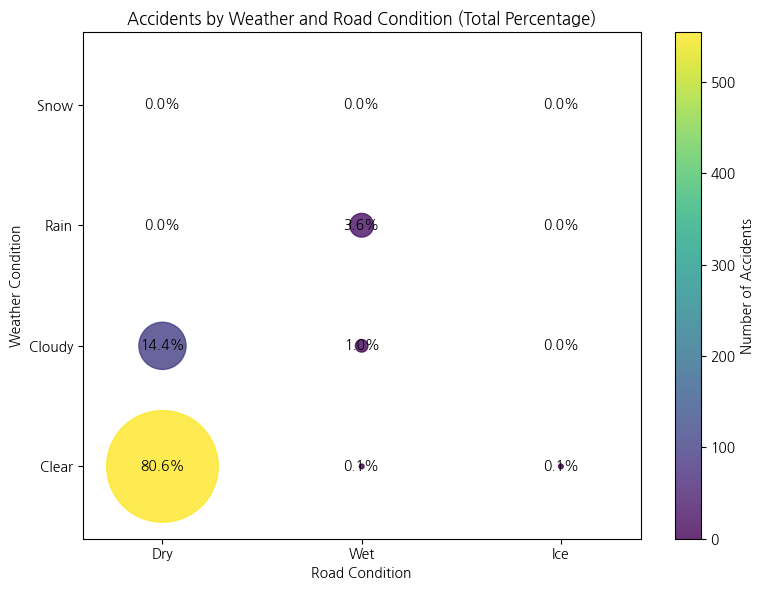

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
weather_conditions = ["Clear", "Cloudy", "Rain", "Snow"]
road_conditions = ["Dry", "Wet", "Ice"]

# 데이터프레임 생성
data = pd.DataFrame(accidents, index=weather_conditions, columns=road_conditions)

# 전체 사고 건수 (총합)
total_accidents = data.values.sum()

# 도트 플롯을 위한 좌표와 값
x = []
y = []
values = []

for i, weather in enumerate(weather_conditions):
    for j, road in enumerate(road_conditions):
        x.append(j * 0.5)  # x 좌표
        y.append(i * 0.5)  # y 좌표
        values.append(data.loc[weather, road])  # 사고 건수

# 그림/축 생성
fig, ax = plt.subplots(figsize=(8, 6))

# 산점도(버블 차트) 생성
scatter = ax.scatter(
    x, y,
    s=[(v / total_accidents) * 8000 for v in values],  # 도트 크기: 비율에 비례
    c=values,
    alpha=0.8
)

# 원 안에 비율 텍스트 추가
for x_val, y_val, value in zip(x, y, values):
    percentage = (value / total_accidents) * 100  # 총합 기준 비율 계산
    ax.text(x_val, y_val, f"{percentage:.1f}%", 
            ha='center', va='center', color='black', fontsize=10)

# X축, Y축 틱 설정
ax.set_xticks([j * 0.5 for j in range(len(road_conditions))])
ax.set_xticklabels(road_conditions)
ax.set_yticks([i * 0.5 for i in range(len(weather_conditions))])
ax.set_yticklabels(weather_conditions)

# 자동 스케일 및 여백 설정
ax.autoscale()
plt.margins(0.2)  # 여백 비율 조정

# 색상바 추가
cbar = plt.colorbar(scatter, ax=ax, label="Number of Accidents")

# 제목 및 라벨
plt.title("Accidents by Weather and Road Condition (Total Percentage)")
plt.xlabel("Road Condition")
plt.ylabel("Weather Condition")

# 레이아웃 정리
plt.tight_layout()
plt.show()


In [107]:
# 맑음
sql0 = """SELECT COUNT(*)
FROM car_accident
WHERE auto_id = 1
AND weather_id = 0
AND state_id = 0"""
# 흐림
sql1 = """SELECT COUNT(*)
FROM car_accident
WHERE auto_id = 1
AND weather_id = 1
AND state_id = 0"""
# 비
sql2 = """SELECT COUNT(*)
FROM car_accident
WHERE auto_id = 1
AND weather_id = 2
AND state_id = 0"""
# 눈
sql3 = """SELECT COUNT(*)
FROM car_accident
WHERE auto_id = 1
AND weather_id = 3
AND state_id = 0"""

cnt0 = getCnt(sql0)
cnt1 = getCnt(sql1)
cnt2 = getCnt(sql2)
cnt3 = getCnt(sql3)
print(cnt0)
print(cnt1)
print(cnt2)
print(cnt3)

155089
6542
10697
540


In [108]:
# 데이터
weather_conditions = ["Clear", "Cloud", "Rain", "Snow"]
manual_acci = [cnt0, cnt1, cnt2, cnt3]
colors = ["skyblue", "steelblue", "lightcoral", "gray"]

# 데이터 준비
data = pd.DataFrame({
    'Weather': weather_conditions,
    'Accidents': manual_acci
})

# 원형그래프 생성 (Plotly)
fig = px.pie(data, values='Accidents', names='Weather', title='Proportion of Accidents by Weather Condition',
             color_discrete_sequence=colors, hole=0.3)  # 도넛형으로 설정 가능
fig.update_traces(textposition='outside', textinfo='percent+label')  # 텍스트를 바깥에 표시

# 출력
fig.show()

In [110]:
import pandas as pd
import plotly.express as px

# 데이터 준비
weather_conditions = ["Clear", "Cloud", "Rain", "Snow"]
manual_acci = [cnt0, cnt1, cnt2, cnt3]
colors = ["skyblue", "steelblue", "lightcoral", "gray"]

# 데이터프레임 생성
data = pd.DataFrame({
    'Weather': weather_conditions,
    'Accidents': manual_acci
})

# 원형그래프 생성 (Plotly)
fig = px.pie(data, values='Accidents', names='Weather', title='Proportion of Accidents by Weather Condition',
             color_discrete_sequence=colors, hole=0.3)  # 도넛형으로 설정 가능

# 텍스트 위치 설정
fig.update_traces(textposition='outside', textinfo='percent+label')

# 마진 조정으로 빈 공백 제거
fig.update_layout(
    margin=dict(t=30, b=30, l=30, r=30),  # 위, 아래, 왼쪽, 오른쪽 여백 설정
    title_x=0.5  # 제목을 그래프 중앙으로 정렬
)

# 그래프 출력
fig.show()


In [ ]:
# 데이터
weather_conditions = ["Clear", "Cloud", "Rain", "Snow"]
manual_acci = [cnt0, cnt1, cnt2, cnt3]
colors = ["skyblue", "steelblue", "lightcoral", "gray"]

# 데이터 준비
data = pd.DataFrame({
    'Weather': weather_conditions,
    'Accidents': manual_acci
})

# 원형그래프 생성 (Plotly)
fig = px.pie(data, values='Accidents', names='Weather', title='Proportion of Accidents by Weather Condition',
             color_discrete_sequence=colors, hole=0.3)  # 도넛형으로 설정 가능
fig.update_traces(textposition='outside', textinfo='percent+label')  # 텍스트를 바깥에 표시

# 출력
fig.show()

In [113]:
import pandas as pd
import plotly.express as px

# 데이터 준비
weather_conditions = ["Clear", "Cloud", "Rain", "Snow"]
manual_acci = [cnt0, cnt1, cnt2, cnt3]
colors = ["skyblue", "steelblue", "lightcoral", "gray"]

# 데이터프레임 생성
data = pd.DataFrame({
    'Weather': weather_conditions,
    'Accidents': manual_acci
})

# 원형그래프 생성 (Plotly)
fig = px.pie(data, values='Accidents', names='Weather', title='Proportion of Accidents by Weather Condition',
             color_discrete_sequence=colors, hole=0.3)  # 도넛형으로 설정 가능

# 텍스트 위치 설정
fig.update_traces(textposition='outside', textinfo='percent+label')

# 제목과 그래프 사이 공간 조정
fig.update_layout(
    title=dict(
        text='Proportion of Accidents by Weather Condition',
        font=dict(size=20),  # 제목 폰트 크기 설정
        x=0.5,  # 제목 중앙 정렬
        y=0.95  # 제목의 위치 (값을 낮출수록 아래로 이동)
    ),
    margin=dict(t=100, b=30, l=30, r=30)  # 상단 여백(t)을 넓게 설정
)

# 그래프 출력
fig.show()


In [144]:
# 속도, movement
# 속도
speed_list = [[0, 10], [11, 20], [21, 30], [31, 40], [41, 50], [51, 60], [61, 70], [71, 80], [81, 90], [91, 100], [101, 110]]
sped_pave_list = []

for i in range(8): 
    l = []
    for e in speed_list:
        sql = """SELECT count(*) FROM car_accident
        WHERE auto_id = 0
        AND state_id = 1
        AND {} <= speed
        AND speed <= {}
        AND movement_id = {}""".format(e[0], e[1], i)
        l.append(getCnt(sql))
    sped_pave_list.append(l)

for i in sped_pave_list:
    print(i)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 14, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[103, 52, 32, 24, 2, 4, 0, 0, 0, 2, 0]
[29, 13, 7, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


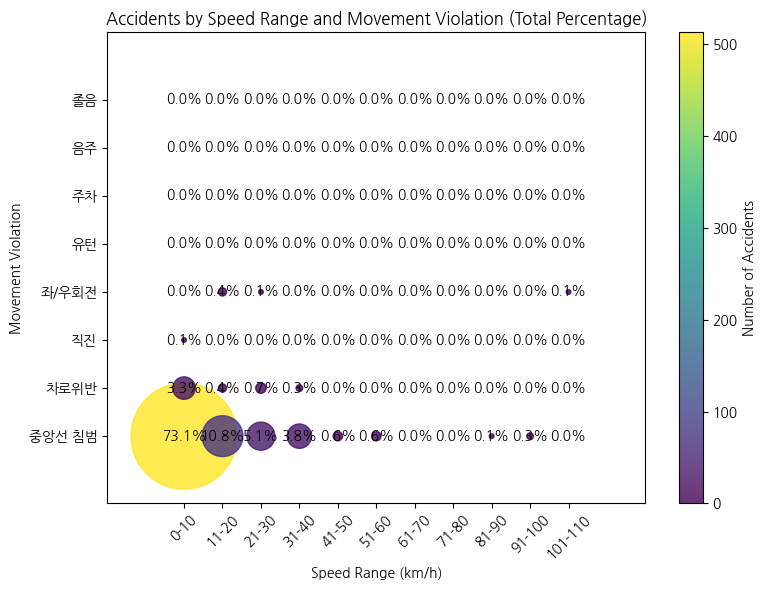

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# X축: 속도 조건(11개)
speed_conditions = ["0-10", "11-20", "21-30", "31-40", 
                    "41-50", "51-60", "61-70", "71-80", 
                    "81-90", "91-100", "101-110"]

# Y축: 교통법규위반(8개)
movement_condi = ["중앙선 침범", "차로위반", "직진", "좌/우회전", "유턴", "주차", "음주", "졸음"]

# 1) 데이터프레임 생성
df = pd.DataFrame(sped_pave_list, index=movement_condi, columns=speed_conditions)

# 2) 전체 사고 건수
total_accidents = df.values.sum()

# 3) 산점도(버블 차트)를 위한 x, y, values 준비
x = []
y = []
values = []

for i, move_item in enumerate(movement_condi):
    for j, speed_item in enumerate(speed_conditions):
        x.append(j * 0.5)  # X축 좌표(속도 구간)
        y.append(i * 0.5)  # Y축 좌표(교통법규위반)
        values.append(df.loc[move_item, speed_item])  # 사고 건수

# 4) 플롯 그리기
fig, ax = plt.subplots(figsize=(8, 6))

# 버블 차트(원 크기는 사고 수 비율)
scatter = ax.scatter(
    x, y,
    s=[(v / total_accidents) * 8000 for v in values],  # 도트 크기: 전체 대비 비율
    c=values,
    alpha=0.8
)

# 각 원 내부에 비율 텍스트 표기
for x_val, y_val, value in zip(x, y, values):
    percentage = (value / total_accidents) * 100
    ax.text(x_val, y_val, f"{percentage:.1f}%", 
            ha='center', va='center', color='black', fontsize=10)

# 5) 축 설정
ax.set_xticks([j * 0.5 for j in range(len(speed_conditions))])
ax.set_xticklabels(speed_conditions, rotation=45)  # 레이블 겹치면 회전
ax.set_yticks([i * 0.5 for i in range(len(movement_condi))])
ax.set_yticklabels(movement_condi)

# 자동 스케일링 + 여백
ax.autoscale()
plt.margins(0.2)

# 색상 바
cbar = plt.colorbar(scatter, ax=ax, label="Number of Accidents")

# 6) 기타 꾸미기
plt.title("Accidents by Speed Range and Movement Violation (Total Percentage)")
plt.xlabel("Speed Range (km/h)")
plt.ylabel("Movement Violation")
plt.tight_layout()

plt.show()


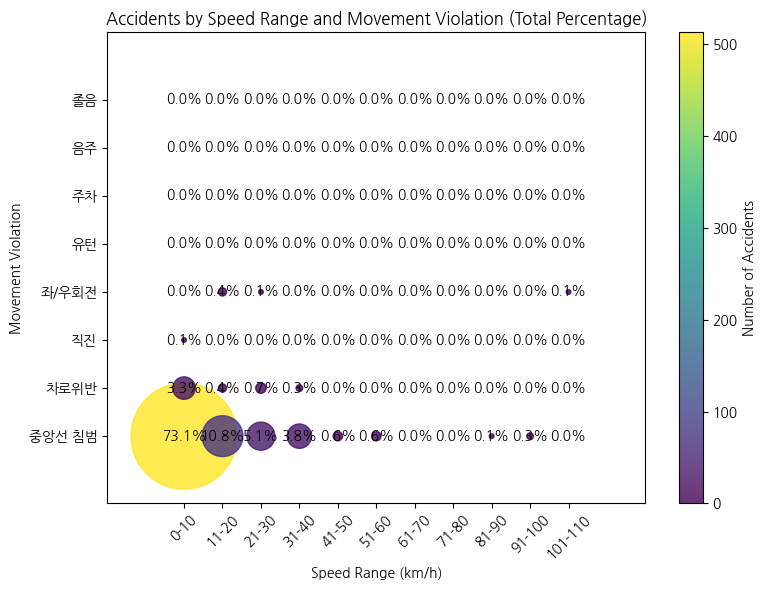

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# X축: 속도 조건(11개)
speed_conditions = ["0-10", "11-20", "21-30", "31-40", 
                    "41-50", "51-60", "61-70", "71-80", 
                    "81-90", "91-100", "101-110"]

# Y축: 교통법규위반(8개)
movement_condi = ["중앙선 침범", "차로위반", "직진", "좌/우회전", "유턴", "주차", "음주", "졸음"]

# 1) 데이터프레임 생성
df = pd.DataFrame(sped_pave_list, index=movement_condi, columns=speed_conditions)

# 2) 전체 사고 건수
total_accidents = df.values.sum()

# 원하는 간격 조정 (기본값 1.0 정도로 잡으면 0.5보다 간격이 넓어짐)
x_gap = 1.0
y_gap = 1.0

# 3) 산점도(버블 차트)를 위한 x, y, values 준비
x = []
y = []
values = []

for i, move_item in enumerate(movement_condi):
    for j, speed_item in enumerate(speed_conditions):
        x.append(j * x_gap)  # X축 좌표: x_gap만큼 띄움
        y.append(i * y_gap)  # Y축 좌표: y_gap만큼 띄움
        values.append(df.loc[move_item, speed_item])  # 사고 건수

# 4) 플롯 그리기
fig, ax = plt.subplots(figsize=(8, 6))

# 버블 차트(원 크기는 사고 수 비율)
scatter = ax.scatter(
    x, y,
    s=[(v / total_accidents) * 8000 for v in values],
    c=values,
    alpha=0.8
)

# 각 원 내부에 비율 표기
for x_val, y_val, value in zip(x, y, values):
    percentage = (value / total_accidents) * 100
    ax.text(x_val, y_val, f"{percentage:.1f}%", 
            ha='center', va='center', color='black', fontsize=10)

# 5) 축 설정
ax.set_xticks([j * x_gap for j in range(len(speed_conditions))])
ax.set_xticklabels(speed_conditions, rotation=45)
ax.set_yticks([i * y_gap for i in range(len(movement_condi))])
ax.set_yticklabels(movement_condi)

# 자동 스케일링 + 여백
ax.autoscale()
plt.margins(0.2)

# 색상 바
cbar = plt.colorbar(scatter, ax=ax, label="Number of Accidents")

# 6) 기타 꾸미기
plt.title("Accidents by Speed Range and Movement Violation (Total Percentage)")
plt.xlabel("Speed Range (km/h)")
plt.ylabel("Movement Violation")
plt.tight_layout()

plt.show()


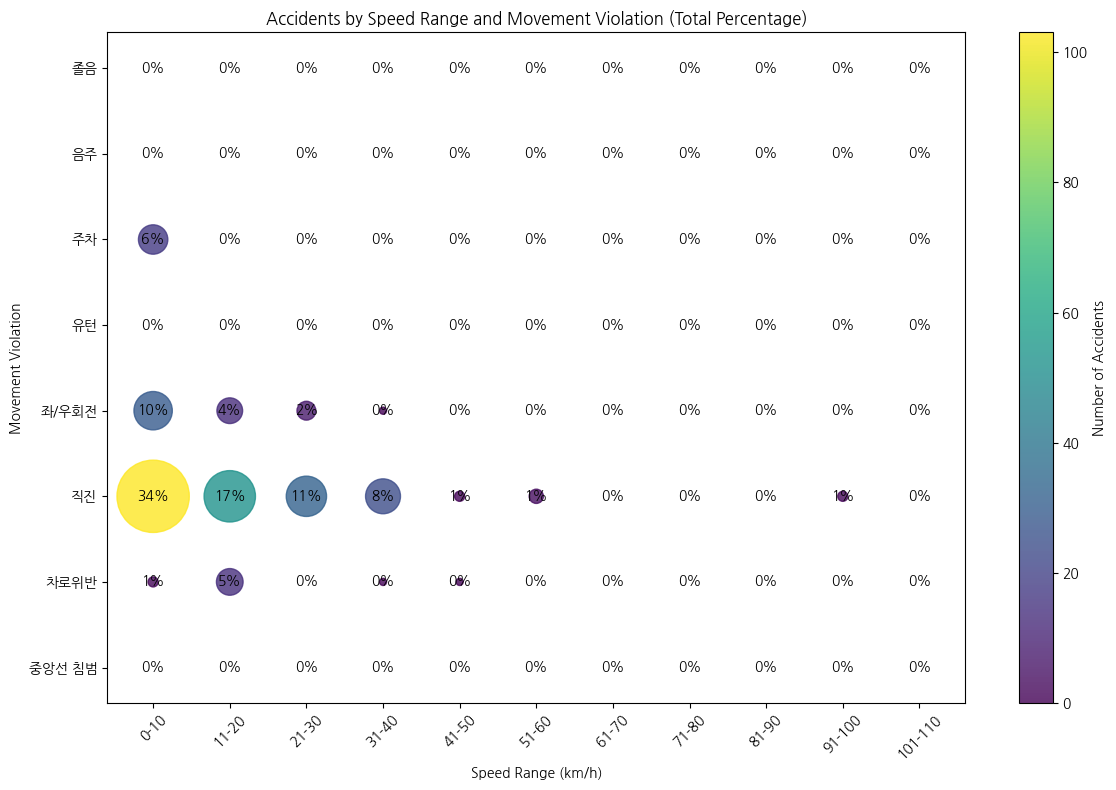

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# X축: 속도 조건(11개)
speed_conditions = ["0-10", "11-20", "21-30", "31-40", 
                    "41-50", "51-60", "61-70", "71-80", 
                    "81-90", "91-100", "101-110"]

# Y축: 교통법규위반(8개)
movement_condi = ["중앙선 침범", "차로위반", "직진", "좌/우회전", "유턴", "주차", "음주", "졸음"]

# 1) 데이터프레임 생성
df = pd.DataFrame(sped_pave_list, index=movement_condi, columns=speed_conditions)

# 2) 전체 사고 건수
total_accidents = df.values.sum()

# 간격 조정
x_gap = 2.0  # X축 간격
y_gap = 2.0  # Y축 간격

# 3) 산점도(버블 차트)를 위한 x, y, values 준비
x = []
y = []
values = []

for i, move_item in enumerate(movement_condi):
    for j, speed_item in enumerate(speed_conditions):
        x.append(j * x_gap)  # X축 좌표
        y.append(i * y_gap)  # Y축 좌표
        values.append(df.loc[move_item, speed_item])  # 사고 건수

# 4) 플롯 그리기
fig, ax = plt.subplots(figsize=(12, 8))  # 그래프 크기 조정

# 버블 차트(원 크기는 사고 수 비율)
scatter = ax.scatter(
    x, y,
    s=[(v / total_accidents) * 8000 for v in values],
    c=values,
    alpha=0.8
)

# 각 원 내부에 비율 표기 (반올림하여 정수로 표현)
for x_val, y_val, value in zip(x, y, values):
    percentage = round((value / total_accidents) * 100)  # 반올림하여 정수화
    ax.text(x_val, y_val, f"{percentage}%", 
            ha='center', va='center', color='black', fontsize=10)

# 5) 축 설정
ax.set_xticks([j * x_gap for j in range(len(speed_conditions))])
ax.set_xticklabels(speed_conditions, rotation=45)
ax.set_yticks([i * y_gap for i in range(len(movement_condi))])
ax.set_yticklabels(movement_condi)

# 자동 스케일링 + 여백
ax.autoscale()
plt.margins(0.06)

# 색상 바
cbar = plt.colorbar(scatter, ax=ax, label="Number of Accidents")

# 6) 기타 꾸미기
plt.title("Accidents by Speed Range and Movement Violation (Total Percentage)")
plt.xlabel("Speed Range (km/h)")
plt.ylabel("Movement Violation")
plt.tight_layout()

plt.show()


In [155]:
sql = """SELECT SUM(speed) FROM car_accident
WHERE auto_id = 0
AND state_id = 1"""

sum = getCnt(sql)

sql = """SELECT COUNT(speed) FROM car_accident
WHERE auto_id = 0
AND state_id = 1"""

cnt = getCnt(sql)

print(sum)
print(cnt)

print(sum / cnt)

4667
702
6.648148148148148148148148148


In [156]:
sql = """SELECT speed FROM car_accident
WHERE auto_id = 0
AND state_id = 1"""

sum = getCnt(sql)

In [ ]:
cur.execute(sql)
result = cur.fetchall()
for e in result:
    print(e[0])

In [158]:
showSql(sql)

(0,)
(0,)
(3,)
(10,)
(0,)
(0,)
(50,)
(19,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(24,)
(2,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(2,)
(0,)
(0,)
(0,)
(0,)
(0,)
(13,)
(2,)
(58,)
(0,)
(0,)
(0,)
(0,)
(0,)
(14,)
(2,)
(6,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(19,)
(2,)
(3,)
(0,)
(11,)
(0,)
(0,)
(0,)
(0,)
(0,)
(19,)
(0,)
(0,)
(0,)
(0,)
(0,)
(2,)
(0,)
(5,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(32,)
(0,)
(0,)
(6,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(3,)
(0,)
(14,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(2,)
(0,)
(0,)
(2,)
(0,)
(13,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(16,)
(16,)
(5,)
(0,)
(0,)
(3,)
(0,)
(2,)
(0,)
(0,)
(5,)
(0,)
(0,)
(35,)
(2,)
(0,)
(0,)
(0,)
(0,)
(98,)
(16,)
(2,)
(0,)
(0,)
(26,)
(16,)
(0,)
(98,)
(0,)
(0,)
(0,)
(0,)
(0,)
(3,)
(5,)
(3,)
(0,)
(35,)
(0,)
(5,)
(0,)
(2,)
(5,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(11,)
(1